In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import sys
current_path = os.getcwd()
parent_directory = os.path.dirname(current_path)
sys.path.append(parent_directory)
from Class.jenie import Jenie
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import umap.umap_ as umap
import leidenalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
from scipy.stats import zscore
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors

In [3]:
plt.style.use('dark_background')

### Read in h5ad file

In [4]:
vizgen_scdata = sc.read_h5ad(r"C:\Users\krist\Cleveland Lab Group\activation_of_quiescent_neurogenic_niches_of_aging_brain\Vizgen_scdata.h5ad")
vizgen_scdata

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 344687 × 550
    obs: 'cell_id', 'sample_id', 'transcript_count', 'leiden', 'cluster_names'
    uns: 'cluster_names_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_spatial', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

### Create color dict

In [8]:
vizgen_celltype_list = list(vizgen_scdata.obs['cluster_names'].unique())
len(vizgen_celltype_list)

29

In [5]:
vizgen_color_dict =  {
        "0": "#07ba7f",
        "1": "#00FF00",
        "2": "#0000FF",
        "3": "#7B68EE",
        "4": "#00FFFF",
        "5": "#FFFF00",
        "6": "#FF00FF",
        "7": "#FF7A00",
        "8": "#008080",
        "9": "#800000",
        "10": "#008000",
        "11": "#000080",
        "12": "#808080",
        "13": "#C0C0C0",
        "14": "#FFA500",
        "15": "#ADD8E6",
        "16": "#90EE90",
        "17": "#FFB6C1",
        "18": "#FFD700",
        "19": "#FF4500",
        "20": "#ADFF2F",
        "21": "#7B68EE",
        "22": "#00FA9A",
        "23": "#48D1CC",
        "24": "#C71585",
        "25": "#8B4513",
        "26": "#4682B4",
        "27": "#D2B48C",
        "28": "#D8BFD8",
        "29": "#FF6347"
}

In [6]:
vizgen_color_list = vizgen_color_dict.values()
vizgen_color_list

dict_values(['#07ba7f', '#00FF00', '#0000FF', '#7B68EE', '#00FFFF', '#FFFF00', '#FF00FF', '#FF7A00', '#008080', '#800000', '#008000', '#000080', '#808080', '#C0C0C0', '#FFA500', '#ADD8E6', '#90EE90', '#FFB6C1', '#FFD700', '#FF4500', '#ADFF2F', '#7B68EE', '#00FA9A', '#48D1CC', '#C71585', '#8B4513', '#4682B4', '#D2B48C', '#D8BFD8', '#FF6347'])

In [9]:
import json
vizgen_dict = {}
for celltype, color in zip(vizgen_celltype_list, vizgen_color_list):
    vizgen_dict[celltype] = color
vizgen_dict = json.dumps(vizgen_dict)
vizgen_dict

'{"CLUSTER 9": "#07ba7f", "VLMC": "#00FF00", "Pvalb / Sst": "#0000FF", "Oligo": "#7B68EE", "IT CTX": "#00FFFF", "L4 IT CTX": "#FFFF00", "Endo": "#FF00FF", "Astro": "#FF7A00", "CLUSTER 2": "#008080", "Micro-PVM": "#800000", "CLUSTER 20": "#008000", "CLUSTER 5": "#000080", "CLUSTER 29": "#808080", "CLUSTER 6": "#C0C0C0", "IT ENTI / IT AI": "#FFA500", "L6 CT CTX": "#ADD8E6", "CLUSTER 27": "#90EE90", "L5/6 NP CTX": "#FFB6C1", "L6b CTX": "#FFD700", "SMC-Peri": "#FF4500", "CLUSTER 18": "#ADFF2F", "CLUSTER 4": "#7B68EE", "VIP": "#00FA9A", "Meis2": "#48D1CC", "CLUSTER 23": "#C71585", "CLUSTER 25": "#8B4513", "CLUSTER 24": "#4682B4", "CLUSTER 26": "#D2B48C", "CLUSTER 28": "#D8BFD8"}'

In [11]:
adata_vizgen = Jenie(vizgen_scdata, 'vizgen_scdata', 'vizgen_scdata', pallete = 'vizgen')

In [12]:
unlabeled_clusters_array = np.array(['CLUSTER 2',
                                     'CLUSTER 4',
                                     'CLUSTER 5',
                                     'CLUSTER 6',
                                     'CLUSTER 9',
                                     'CLUSTER 18',
                                     'CLUSTER 20',
                                     'CLUSTER 23',
                                     'CLUSTER 24',
                                     'CLUSTER 25',
                                     'CLUSTER 26',
                                     'CLUSTER 27',
                                     'CLUSTER 28',
                                     'CLUSTER 29',])

In [13]:
vizgen_unlabeled = vizgen_scdata[vizgen_scdata.obs['cluster_names'].isin(unlabeled_clusters_array)]
vizgen_unlabeled

View of AnnData object with n_obs × n_vars = 131245 × 550
    obs: 'cell_id', 'sample_id', 'transcript_count', 'leiden', 'cluster_names'
    uns: 'cluster_names_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_spatial', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [14]:
adata_vizgen_unlabeled = Jenie(vizgen_unlabeled, 'vizgen_unlabeled', 'vizgen_unlabeled', pallete = 'vizgen')

In [18]:
adata_vizgen_unlabeled.plot_cluster_scdata(group = 'cluster_names', clusters = ['CLUSTER 5'],  ref = adata_vizgen, sbig = 10, ssm = 1, flipy = -1)
plt.title("hello", 'fontsize' = 10)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3258444283.py, line 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

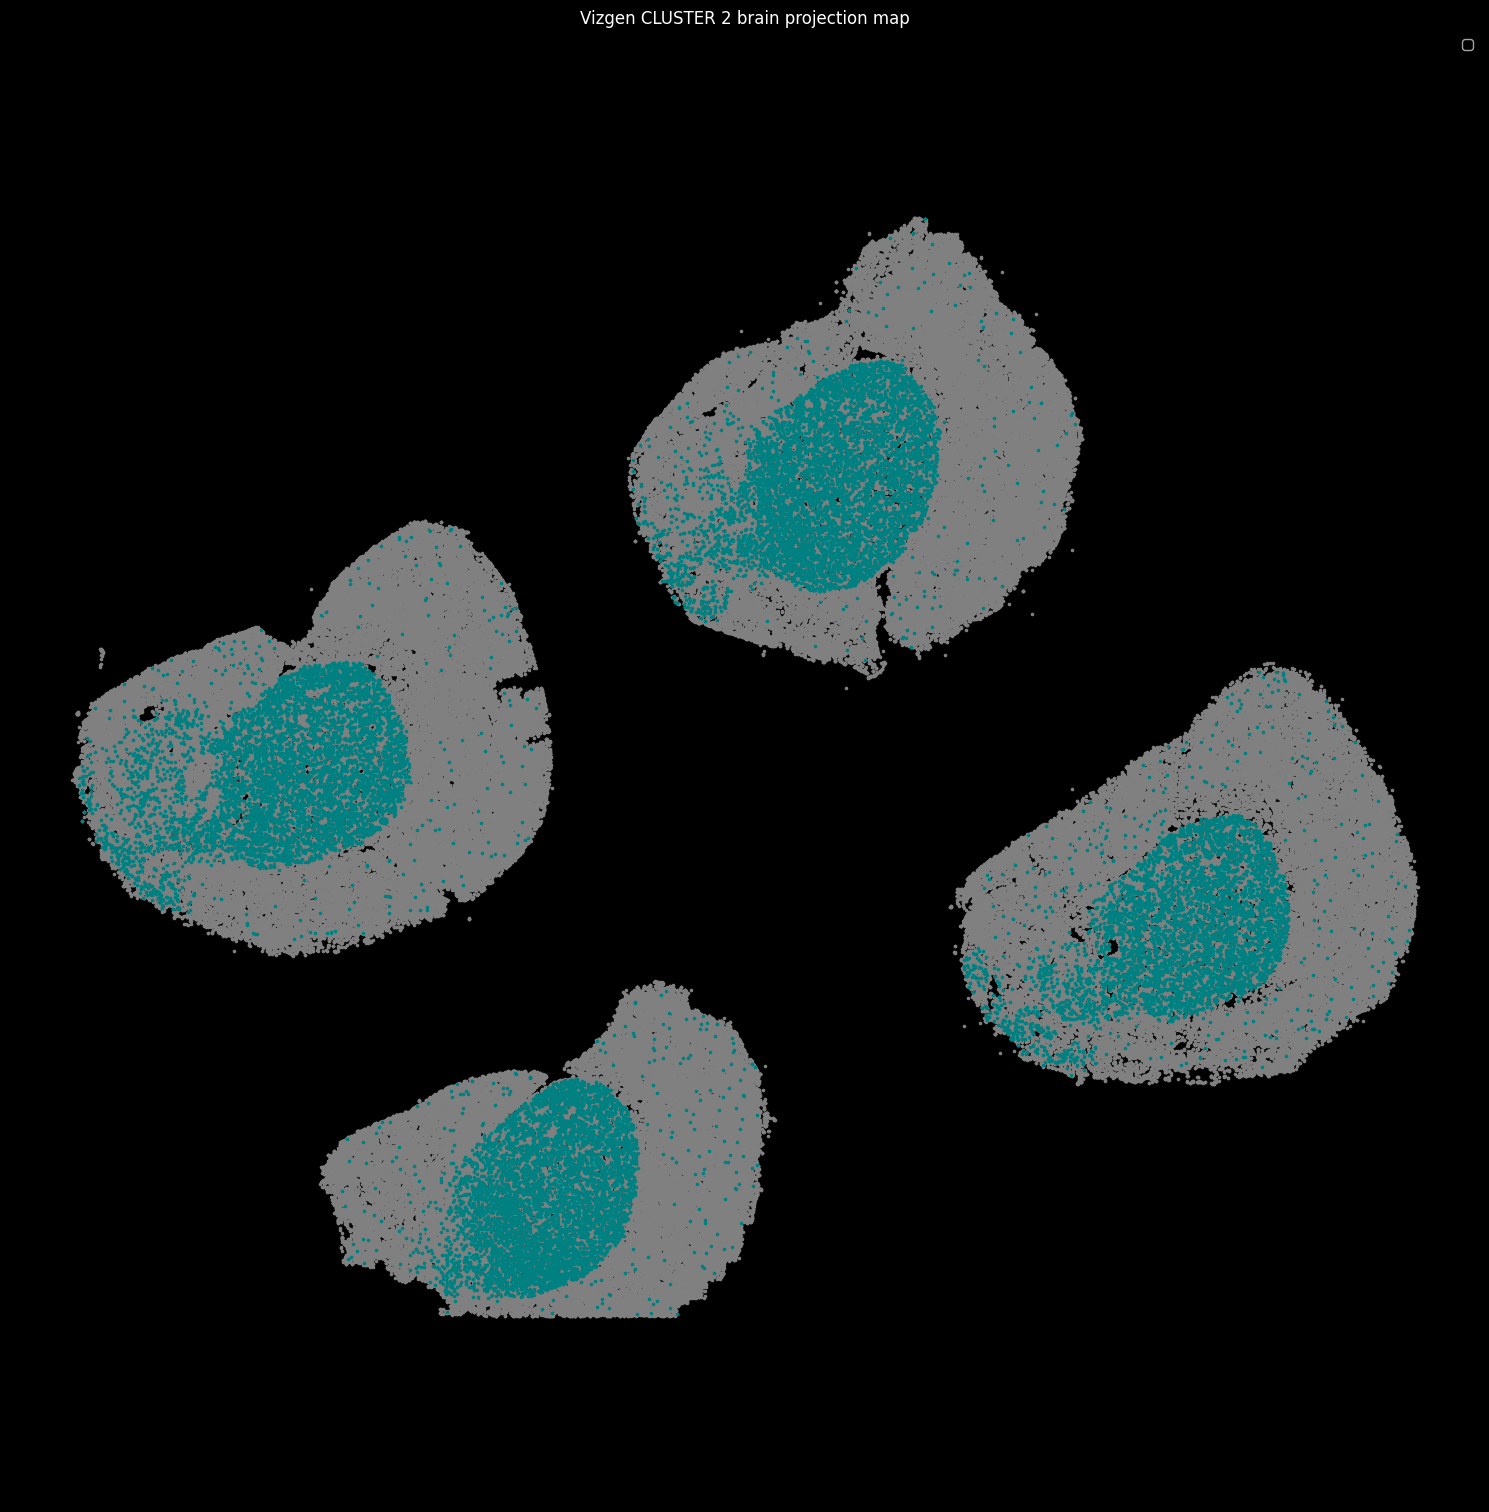

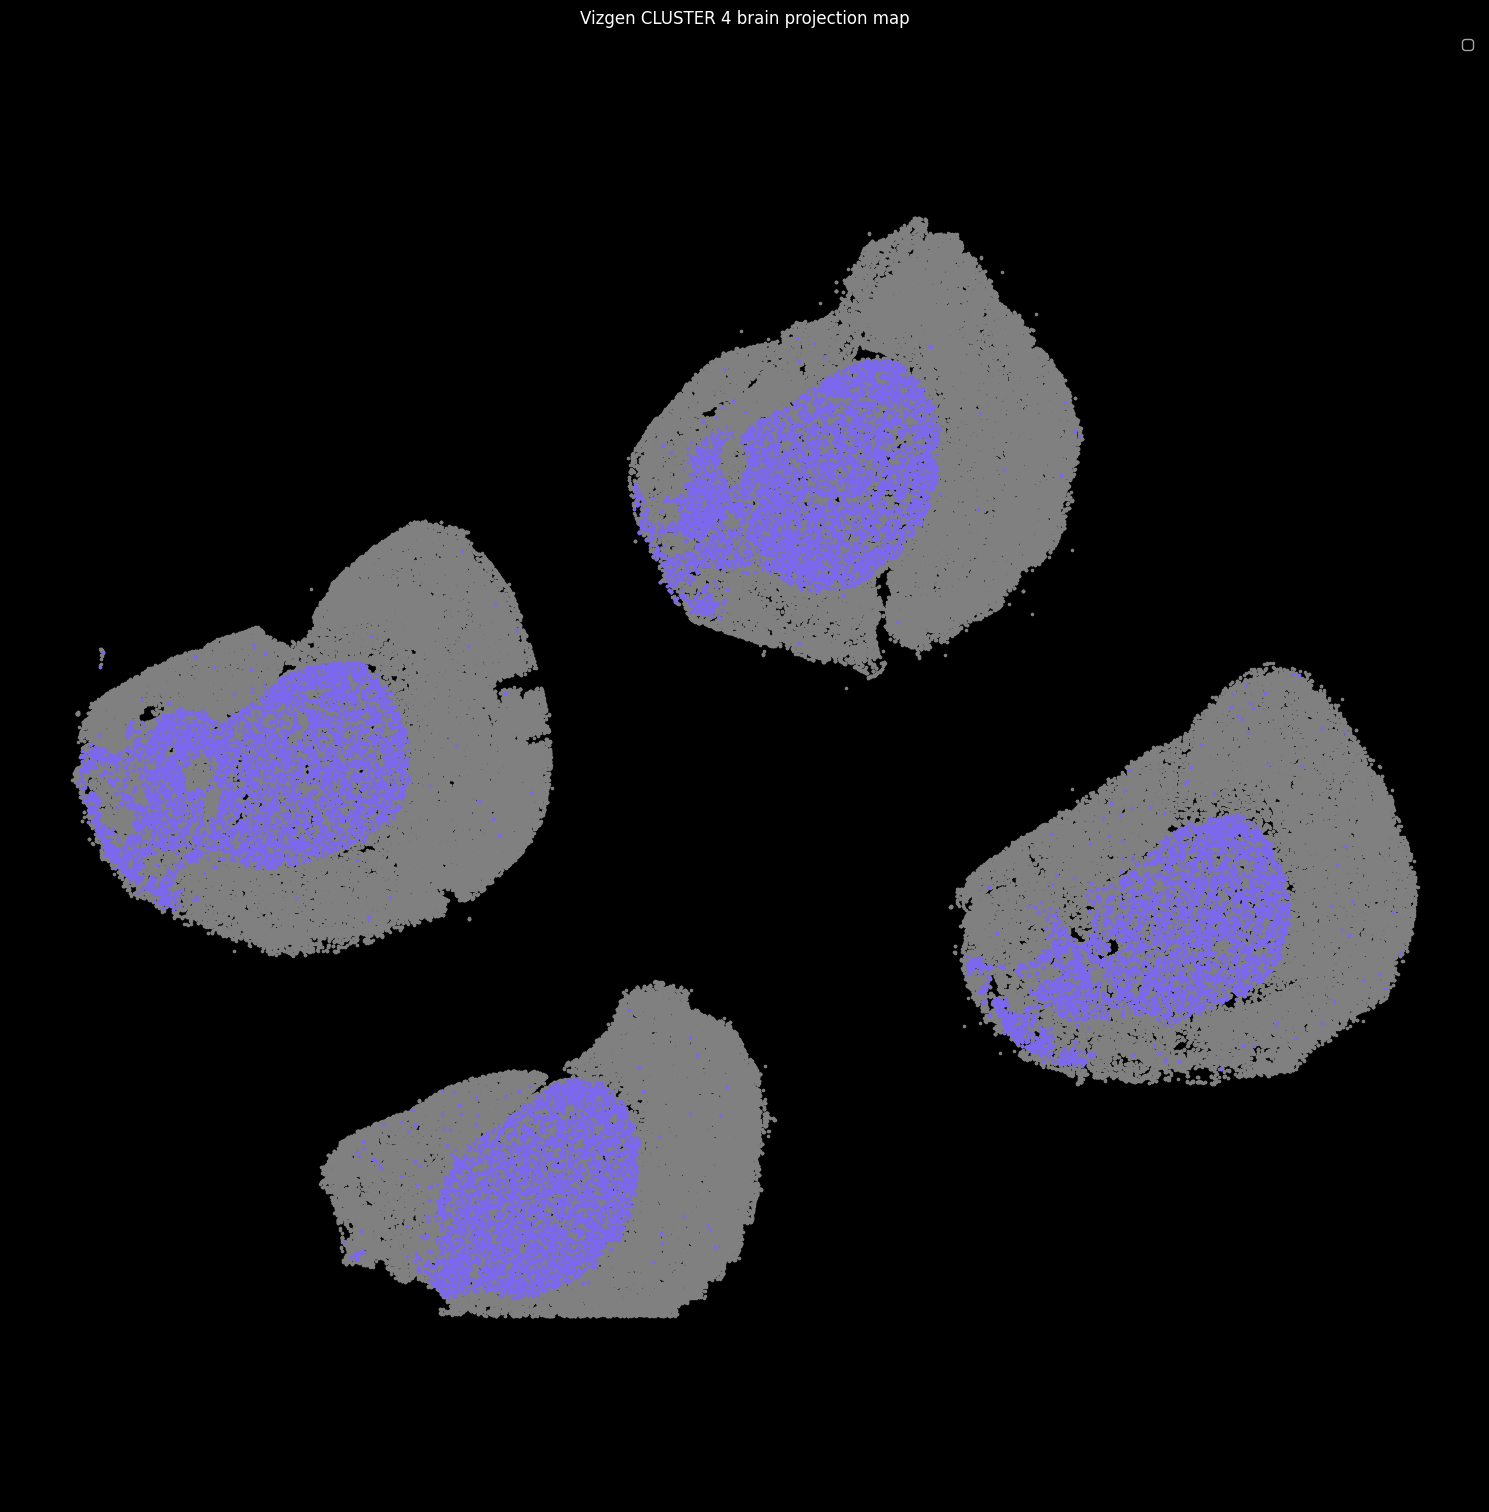

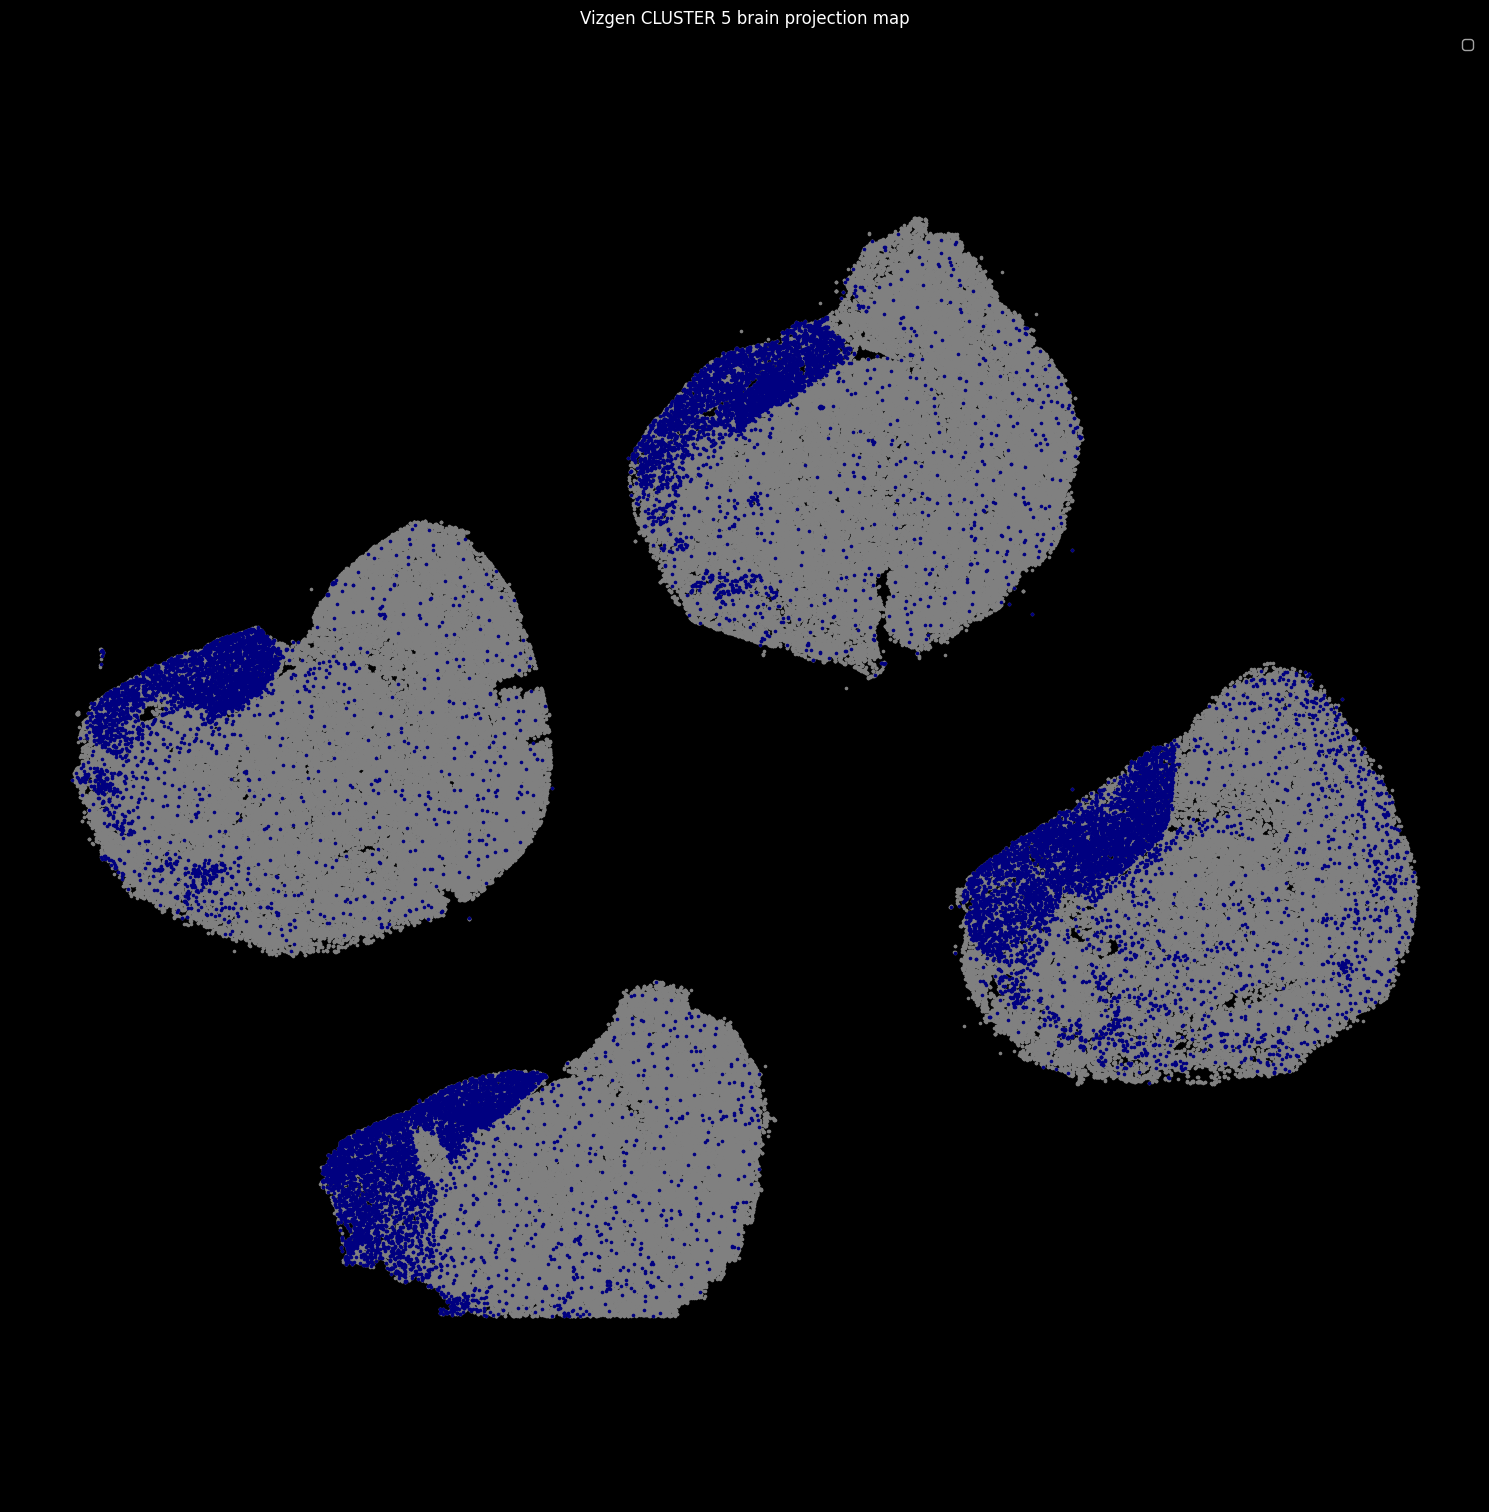

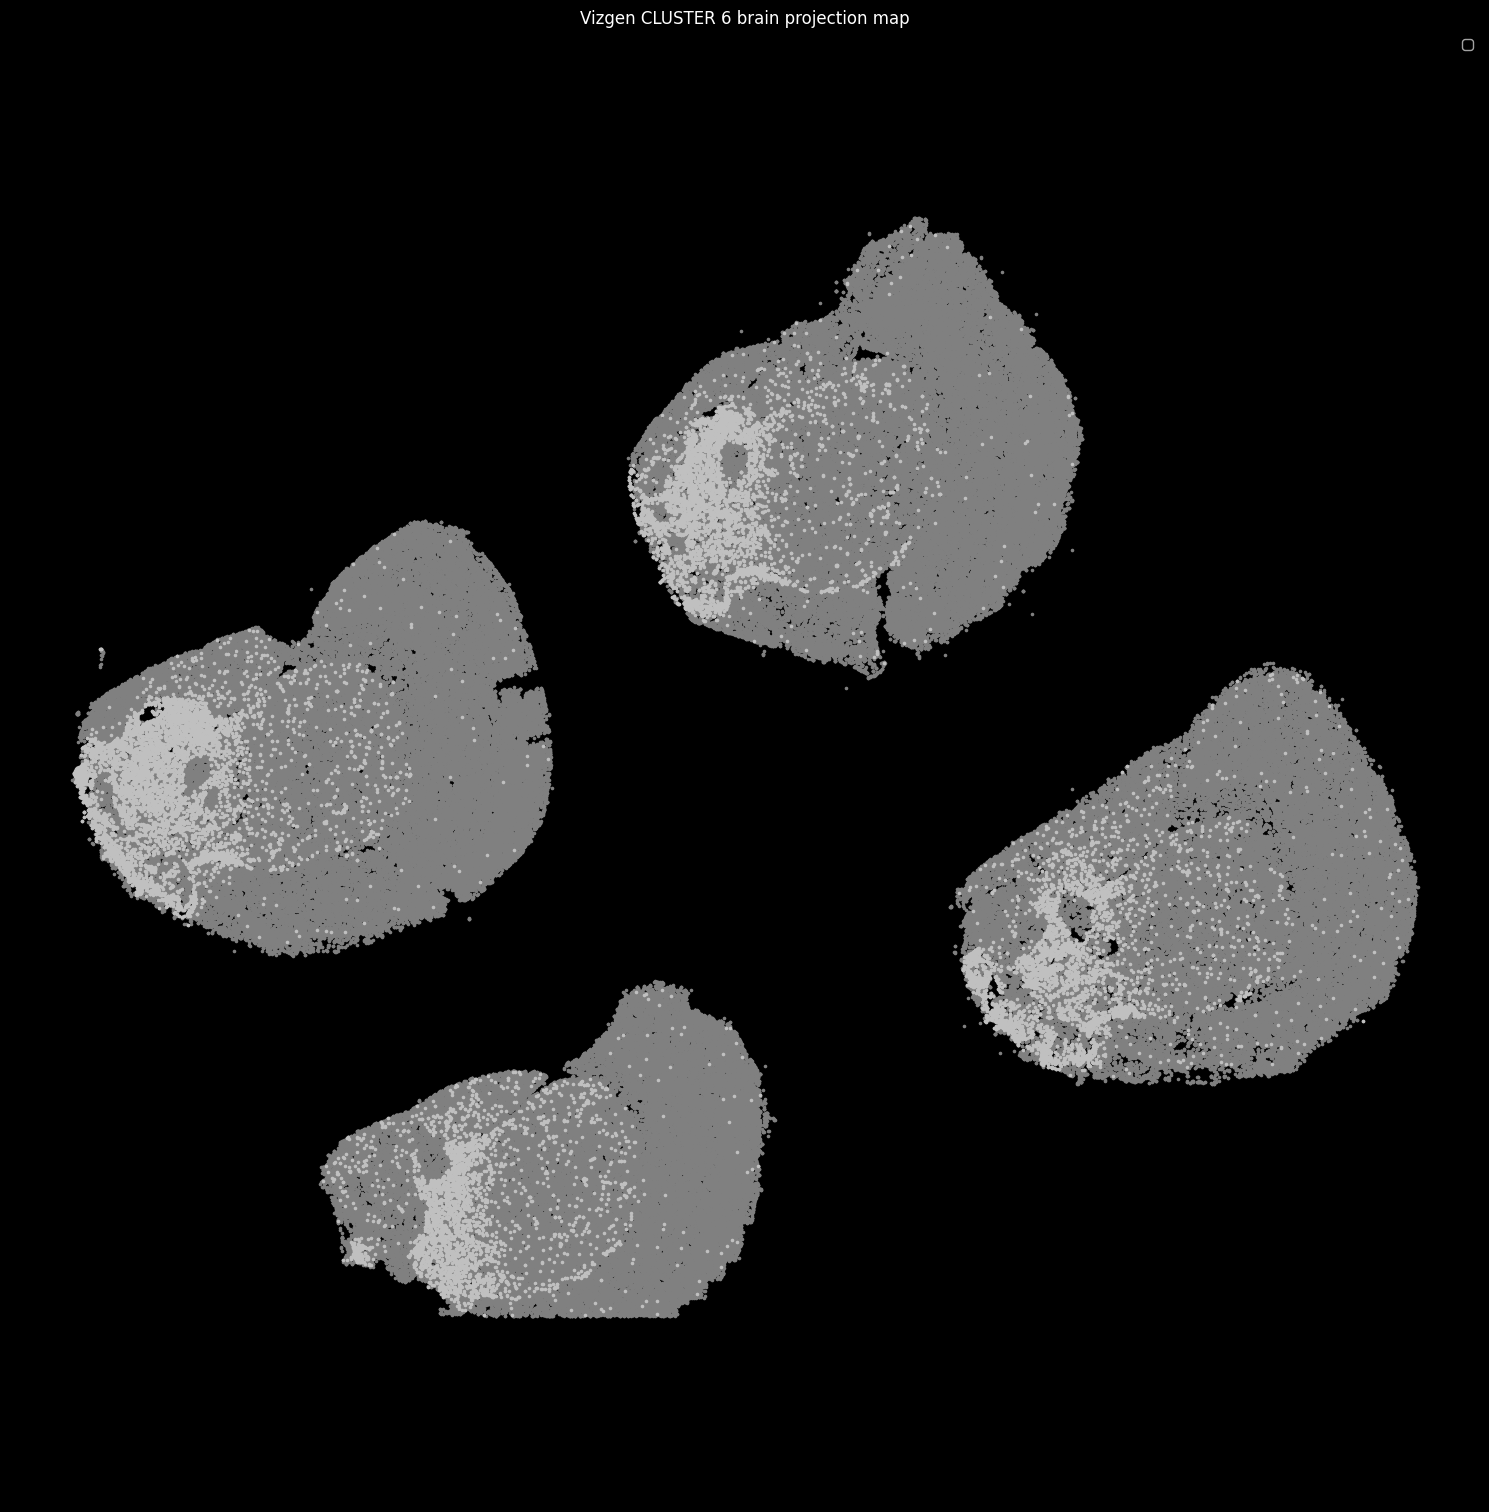

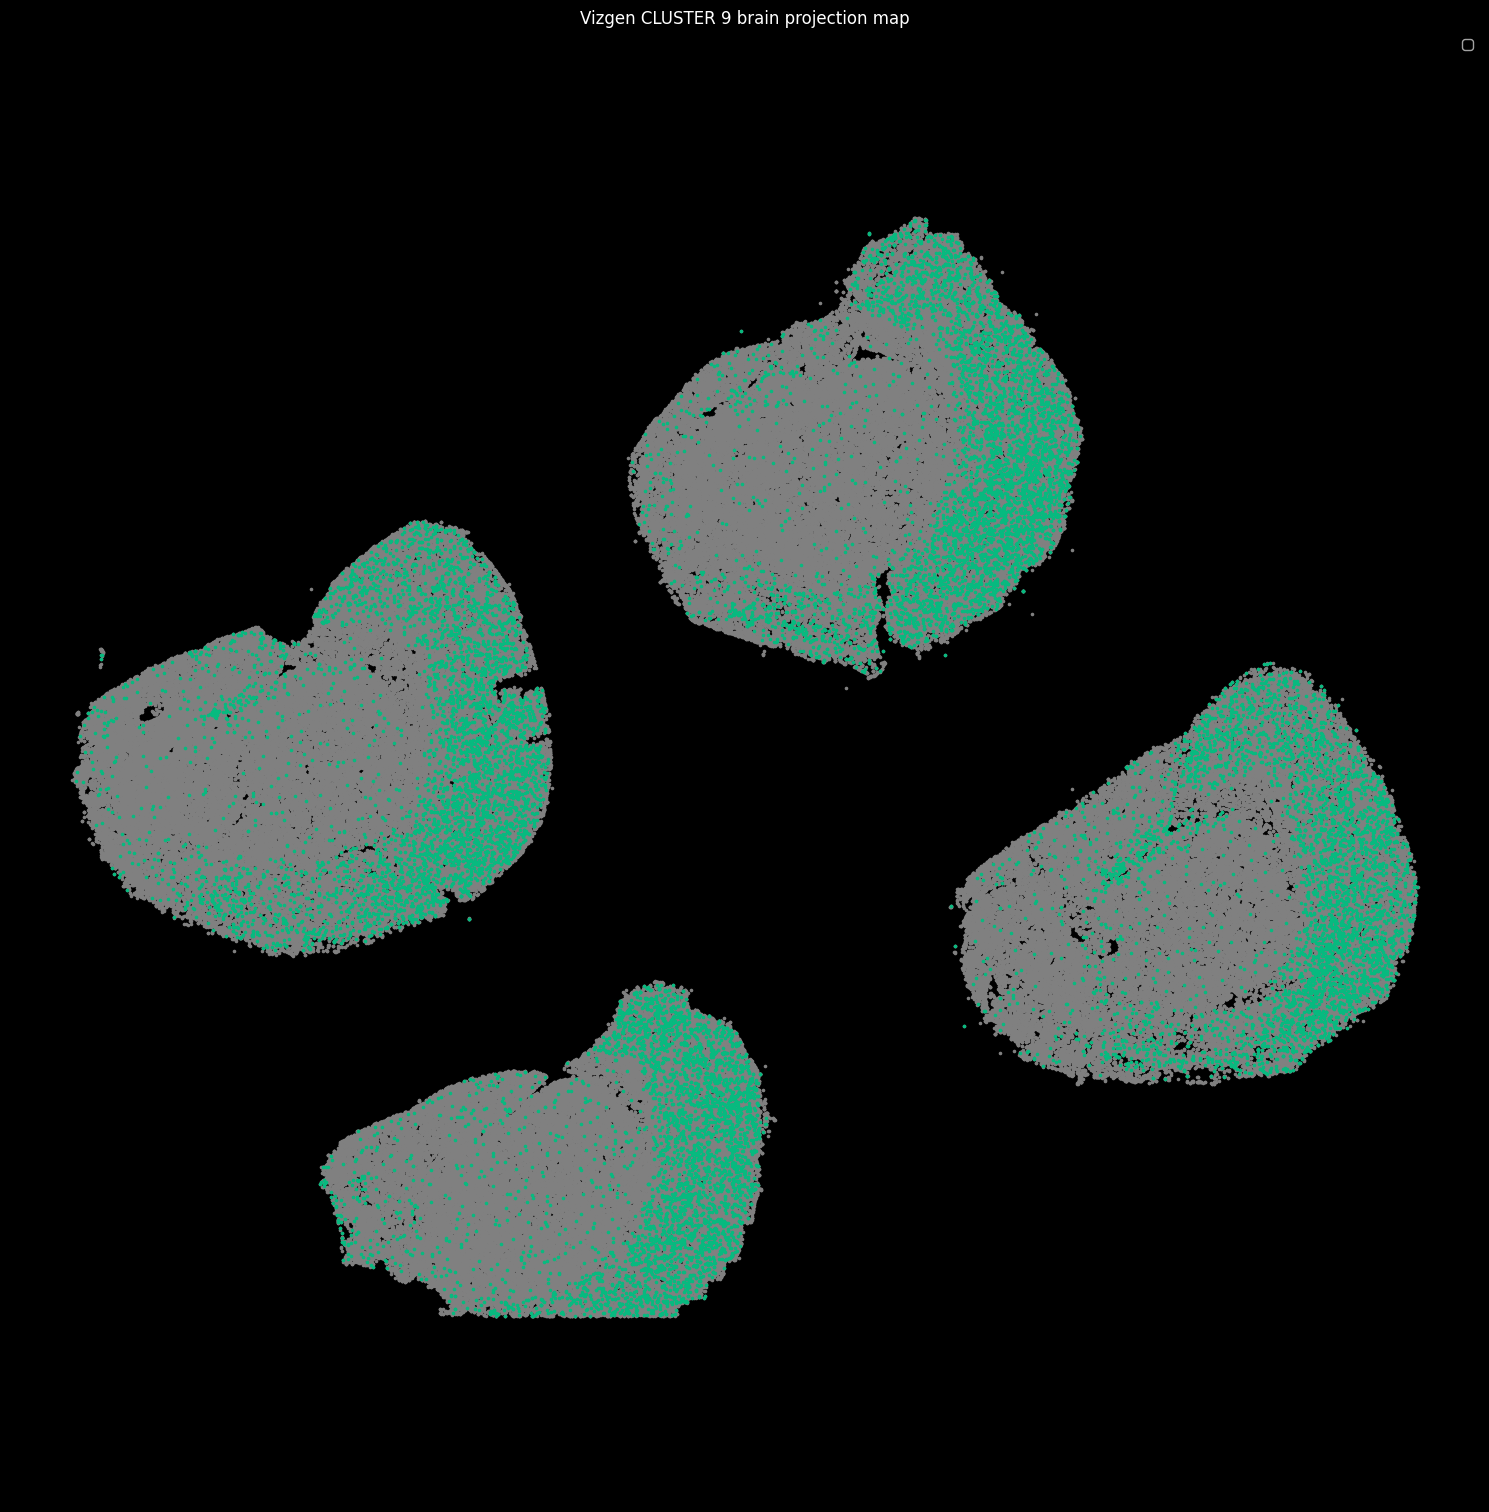

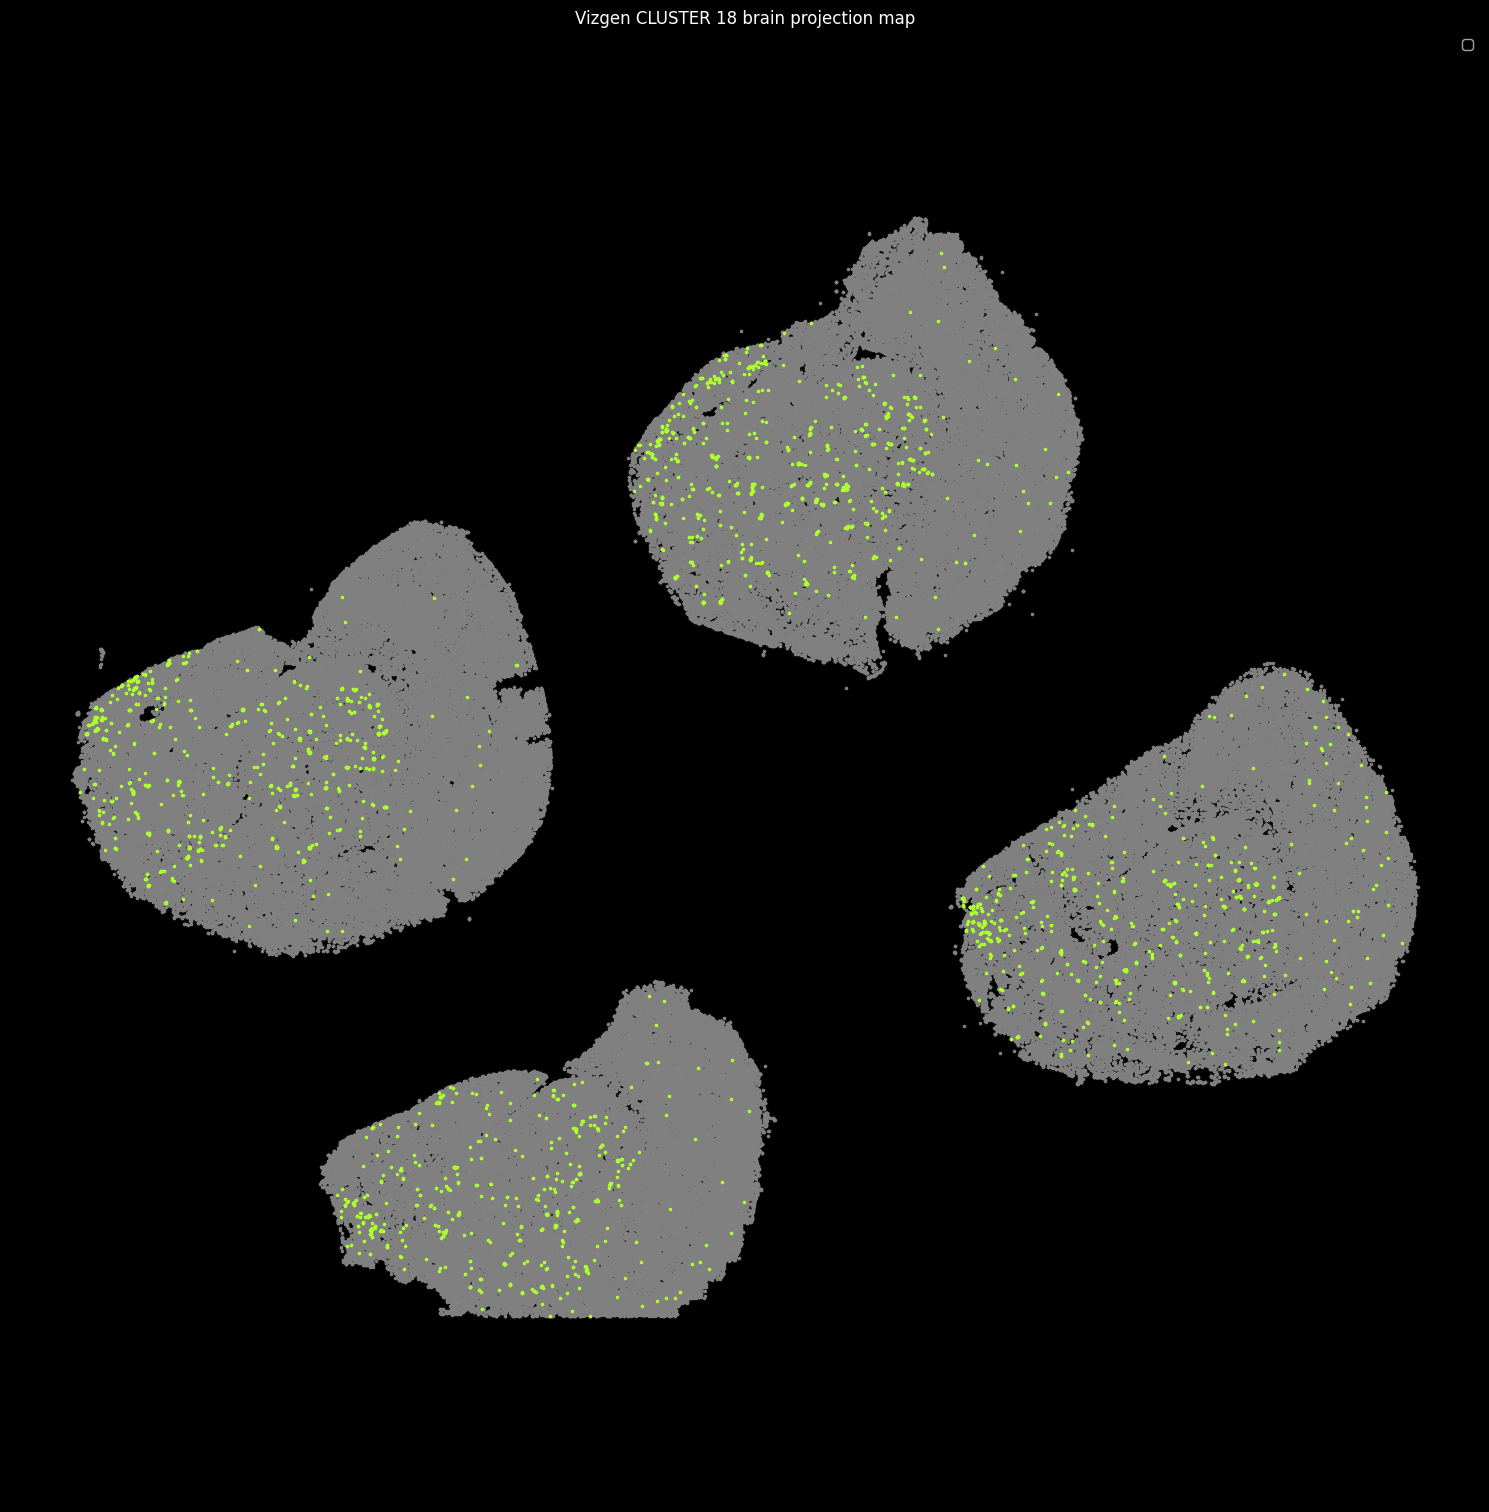

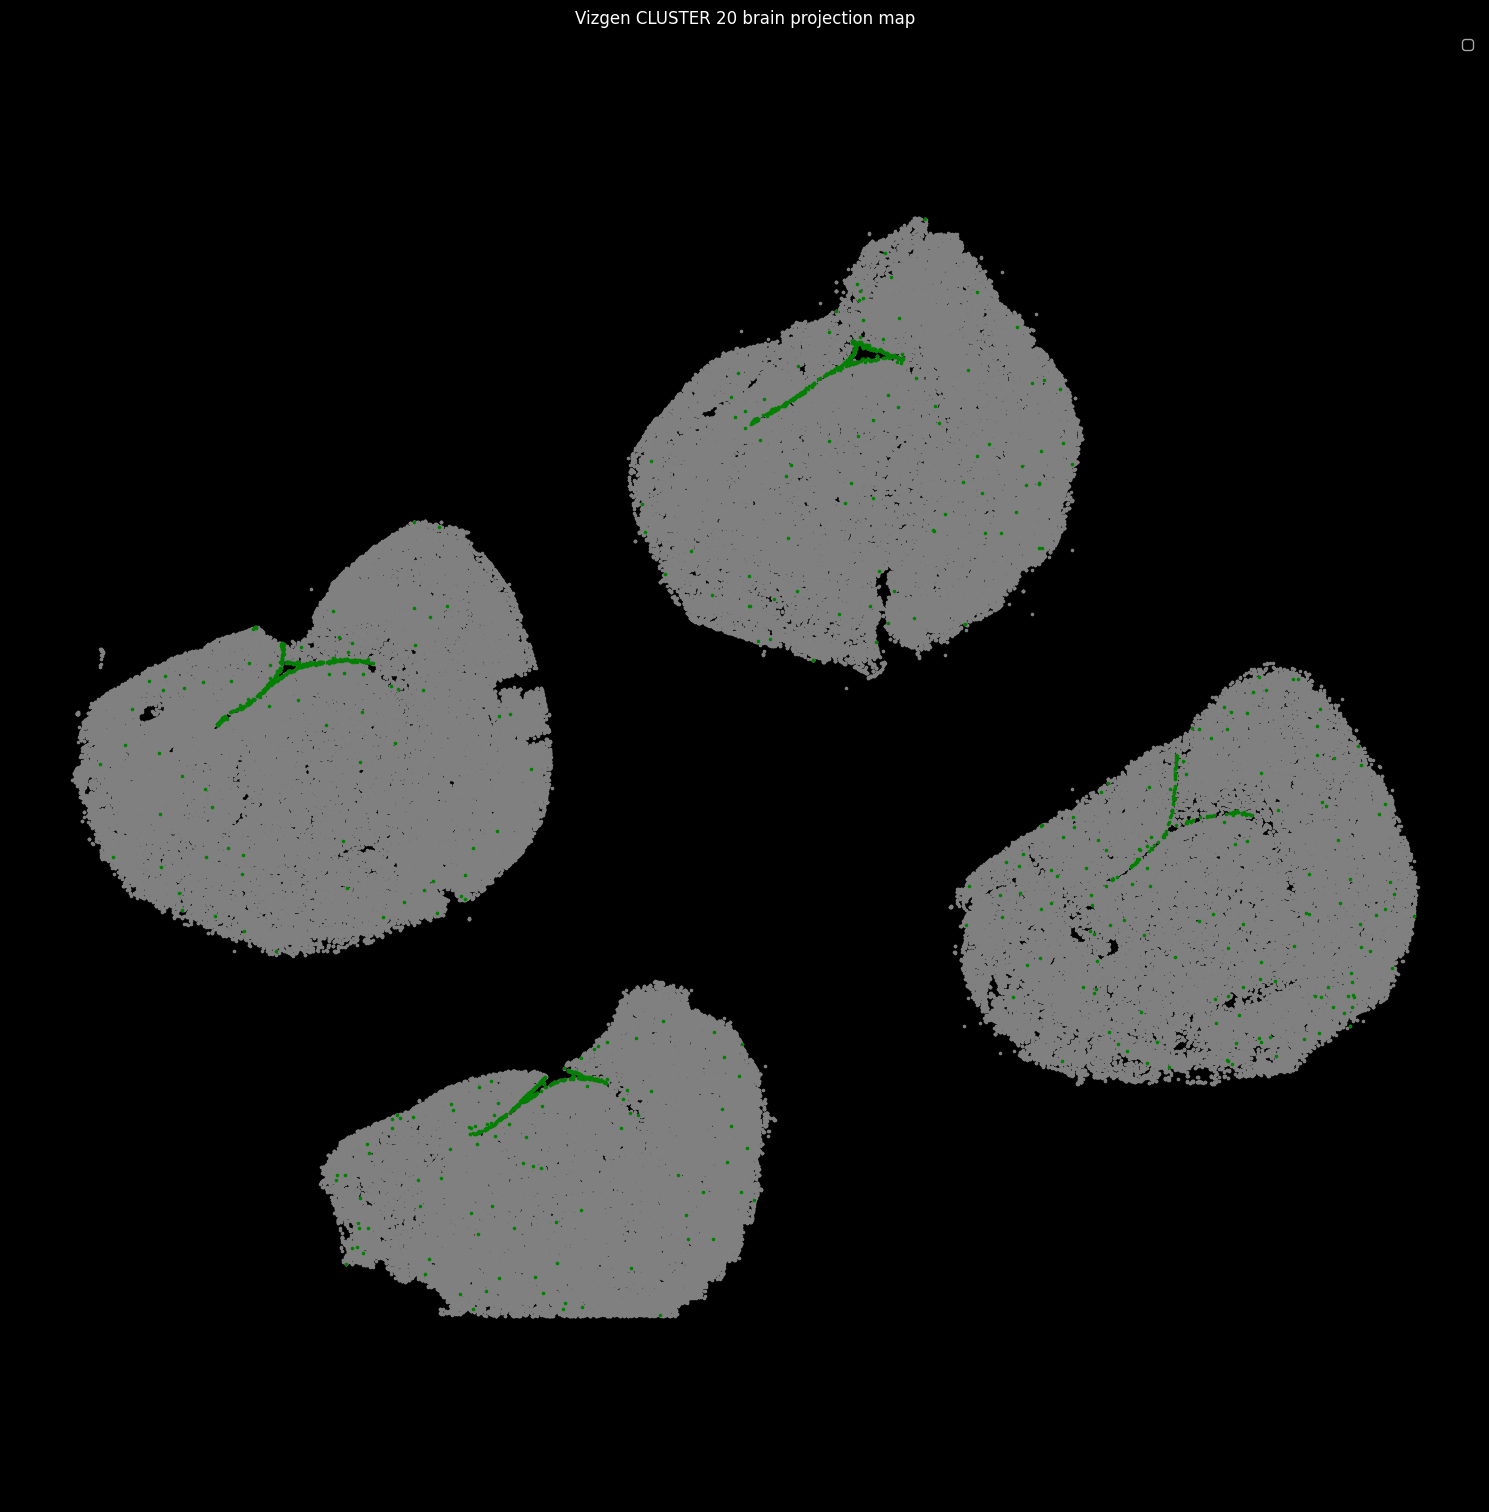

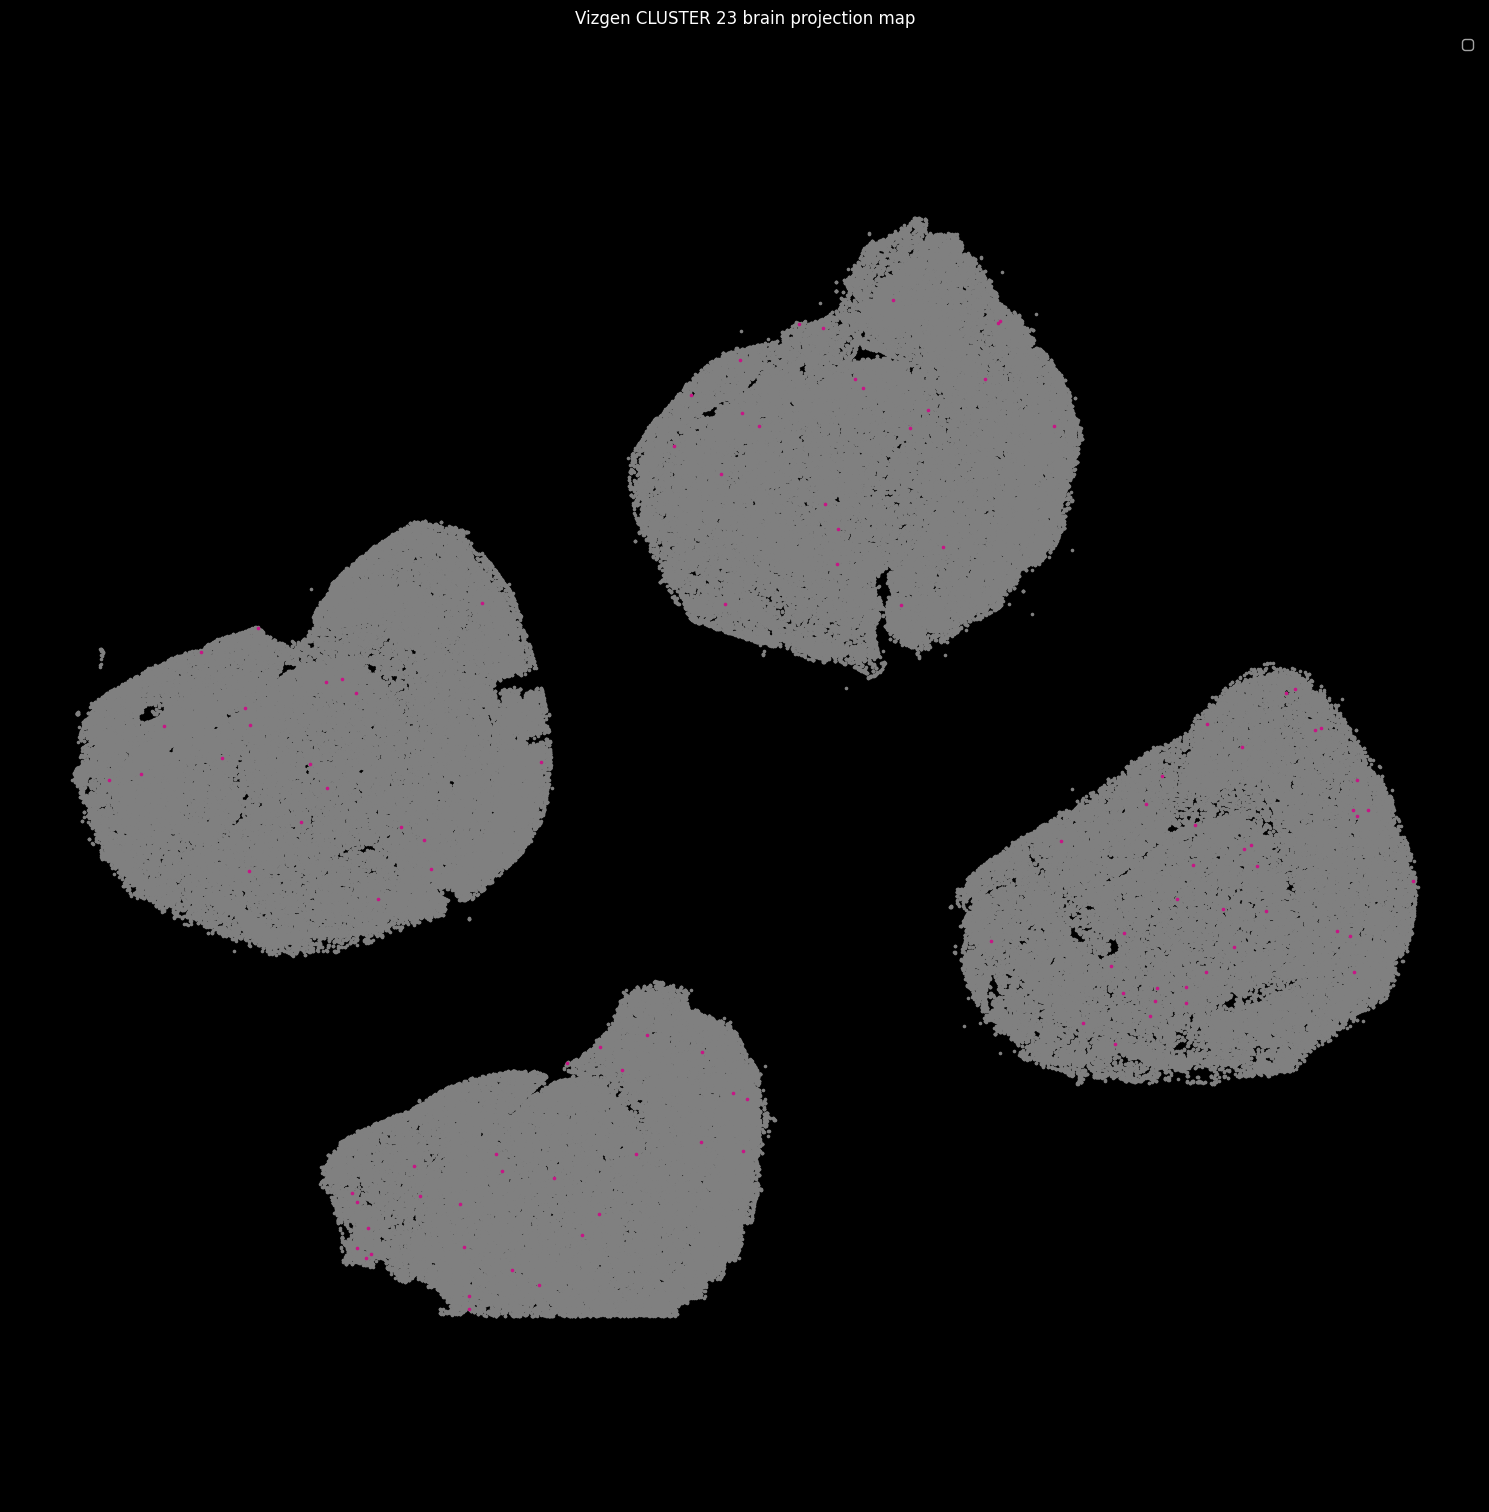

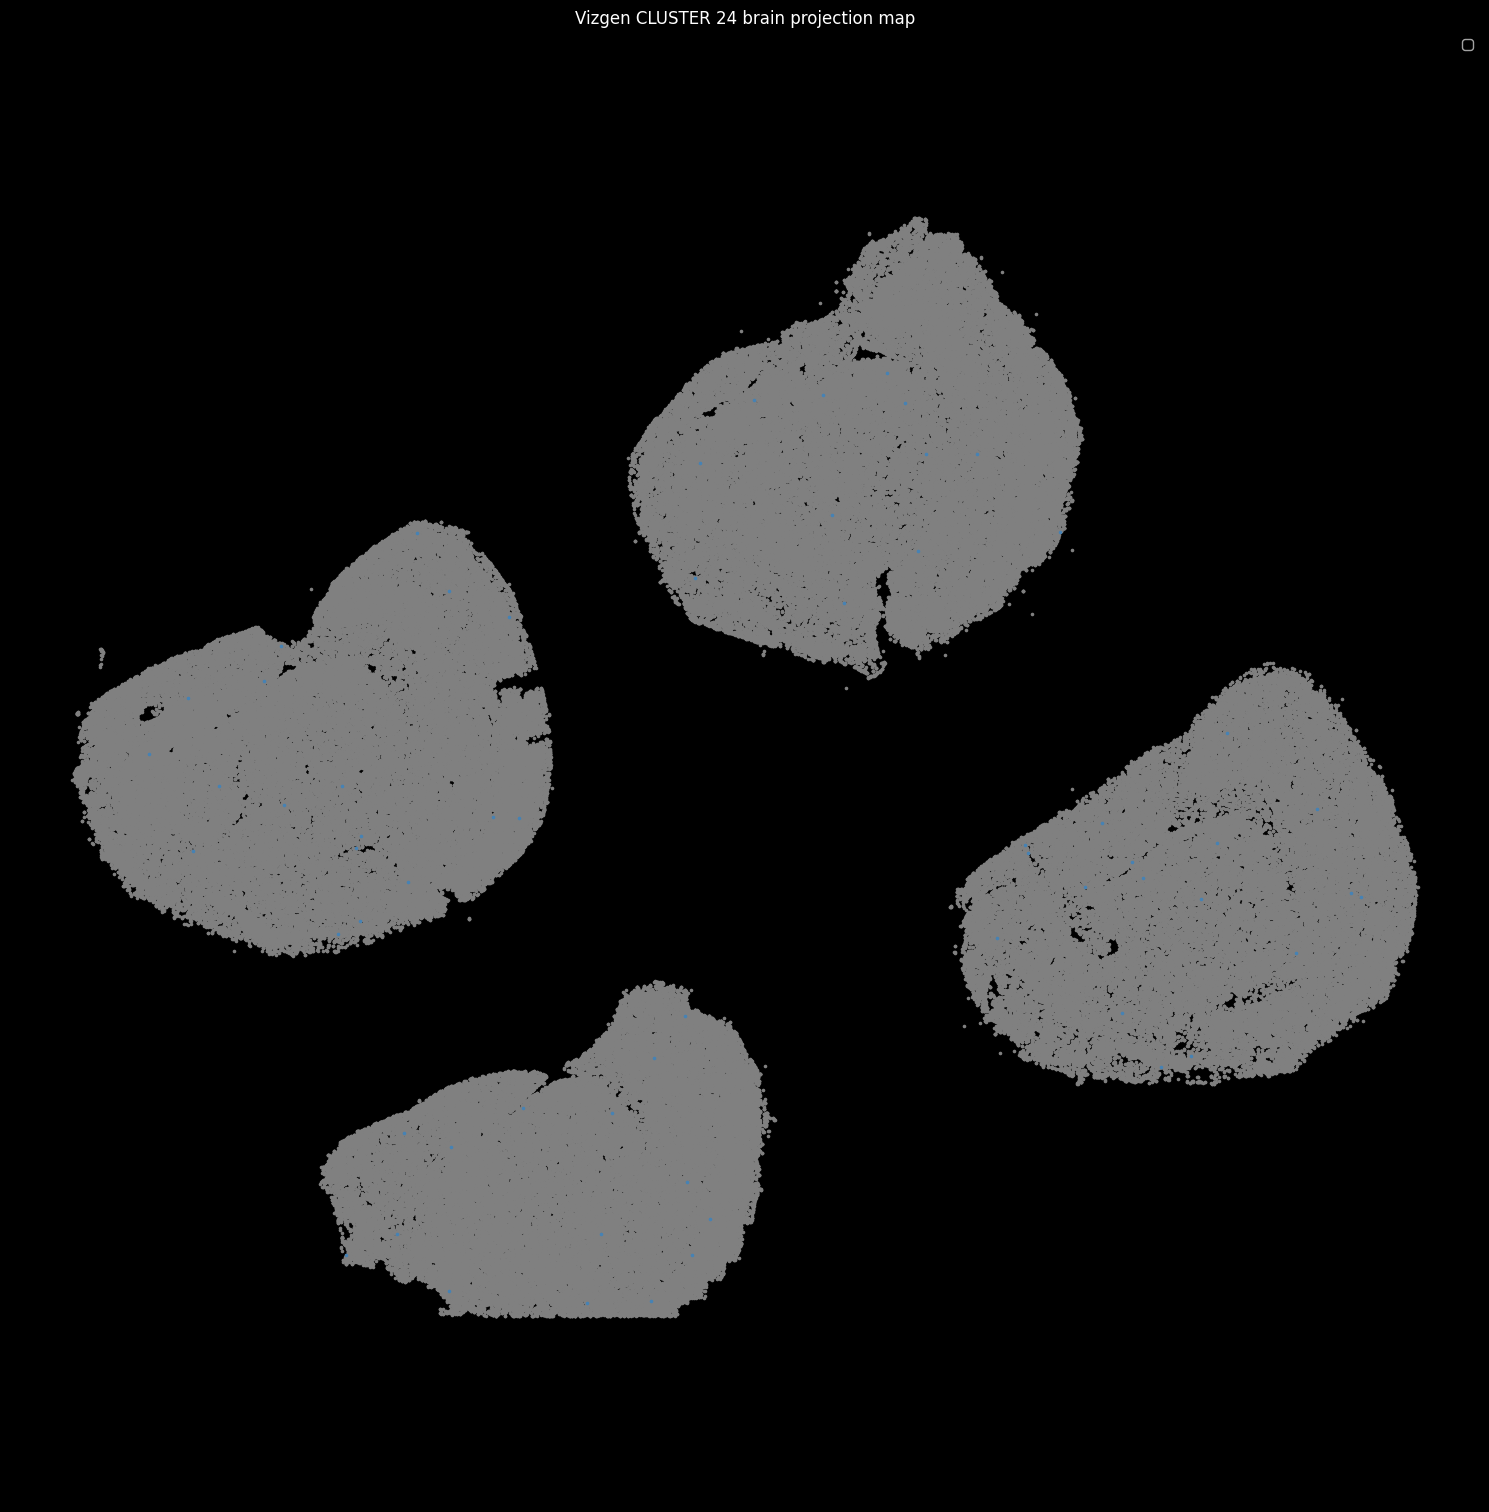

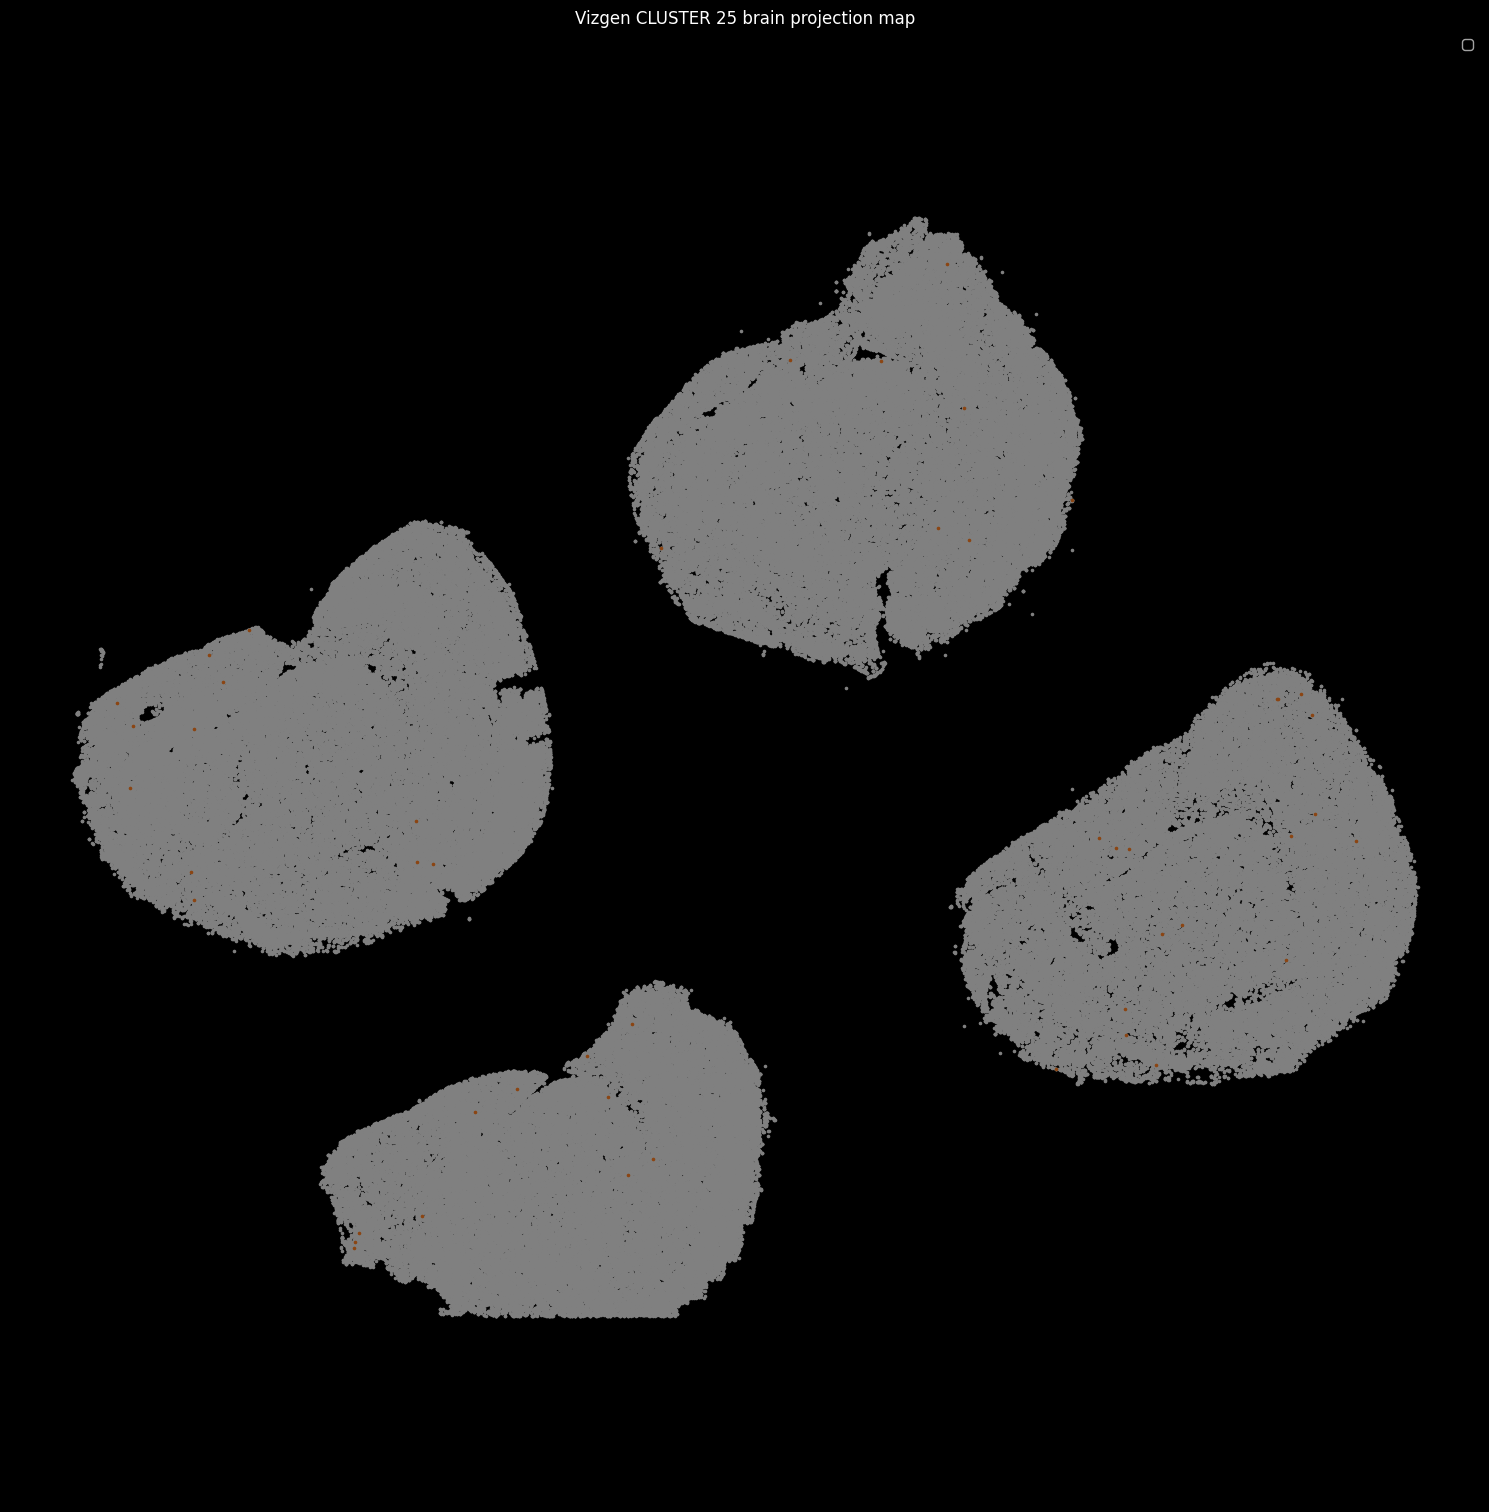

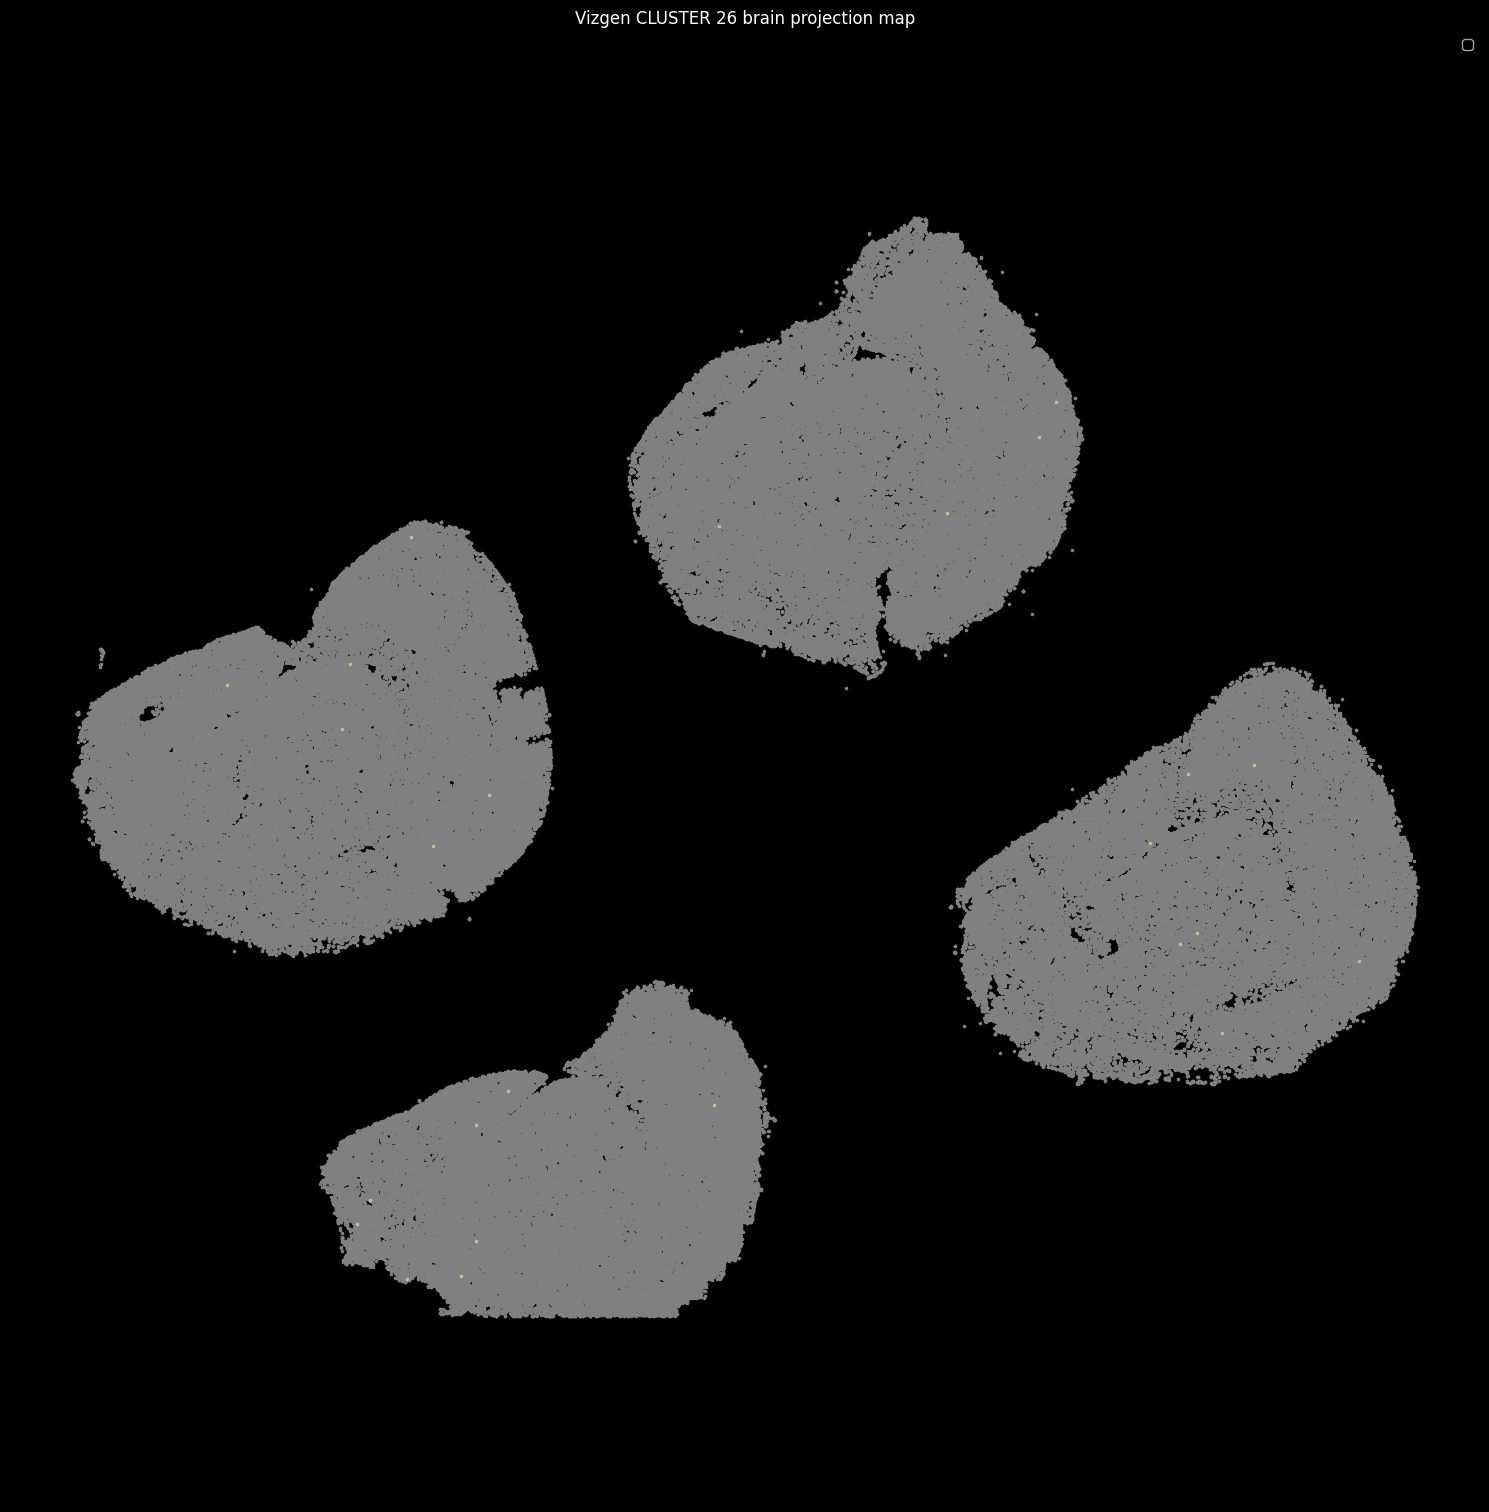

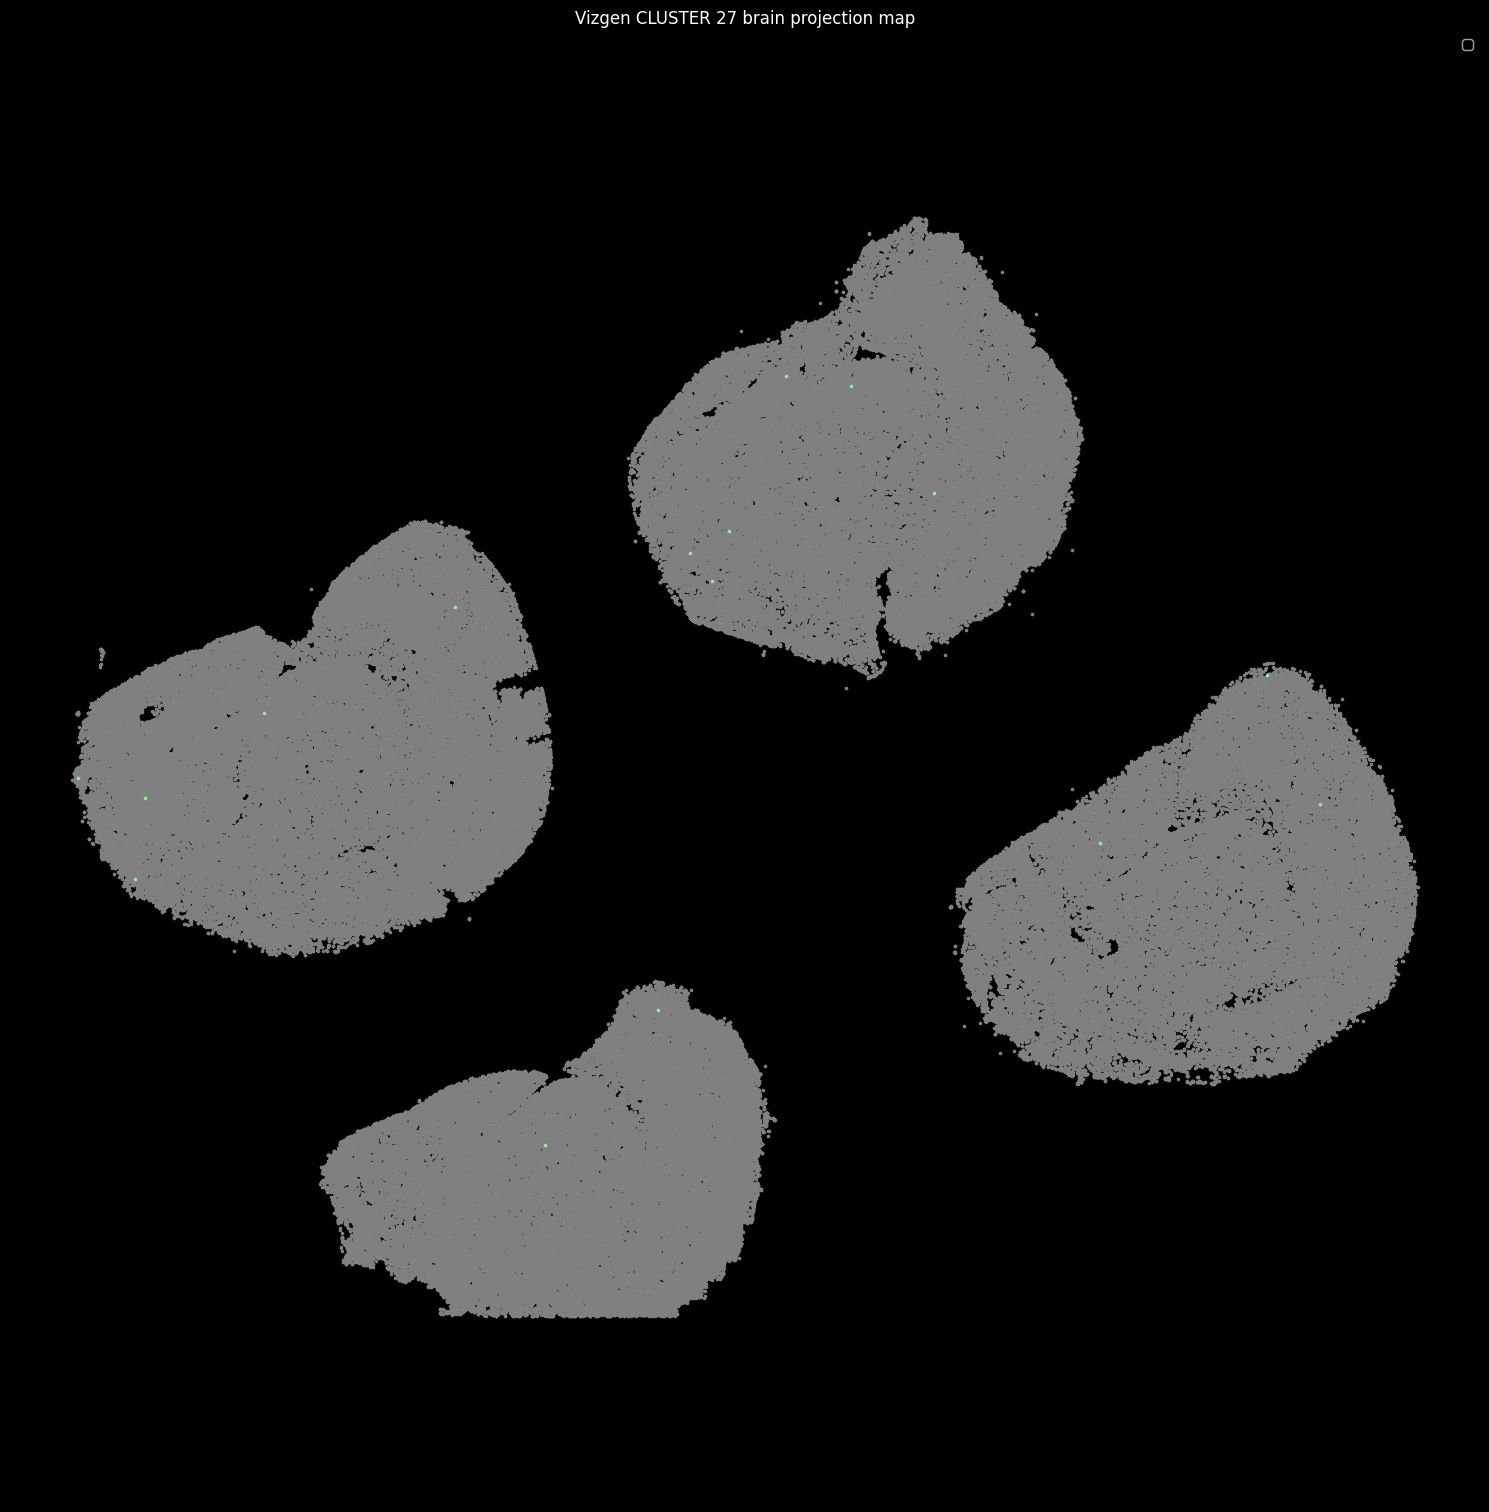

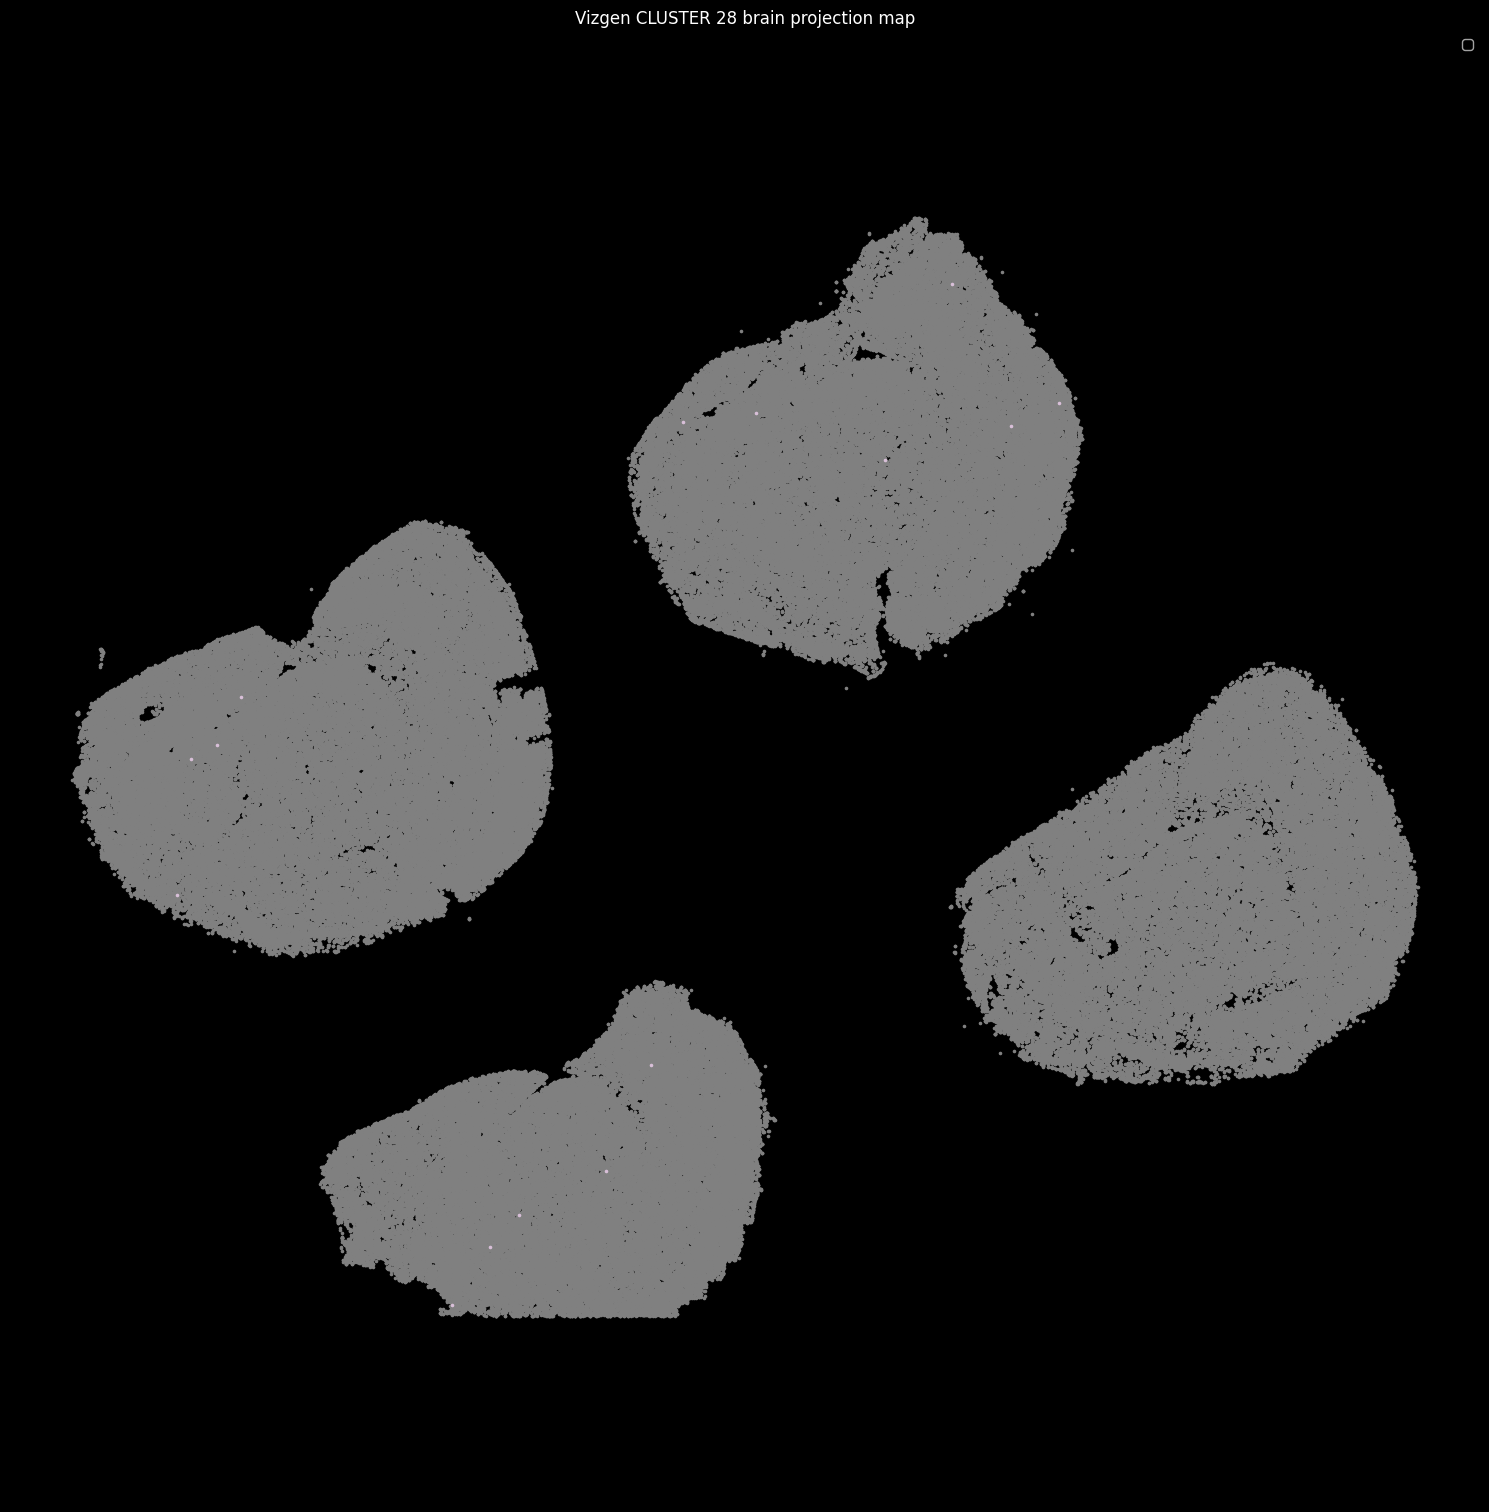

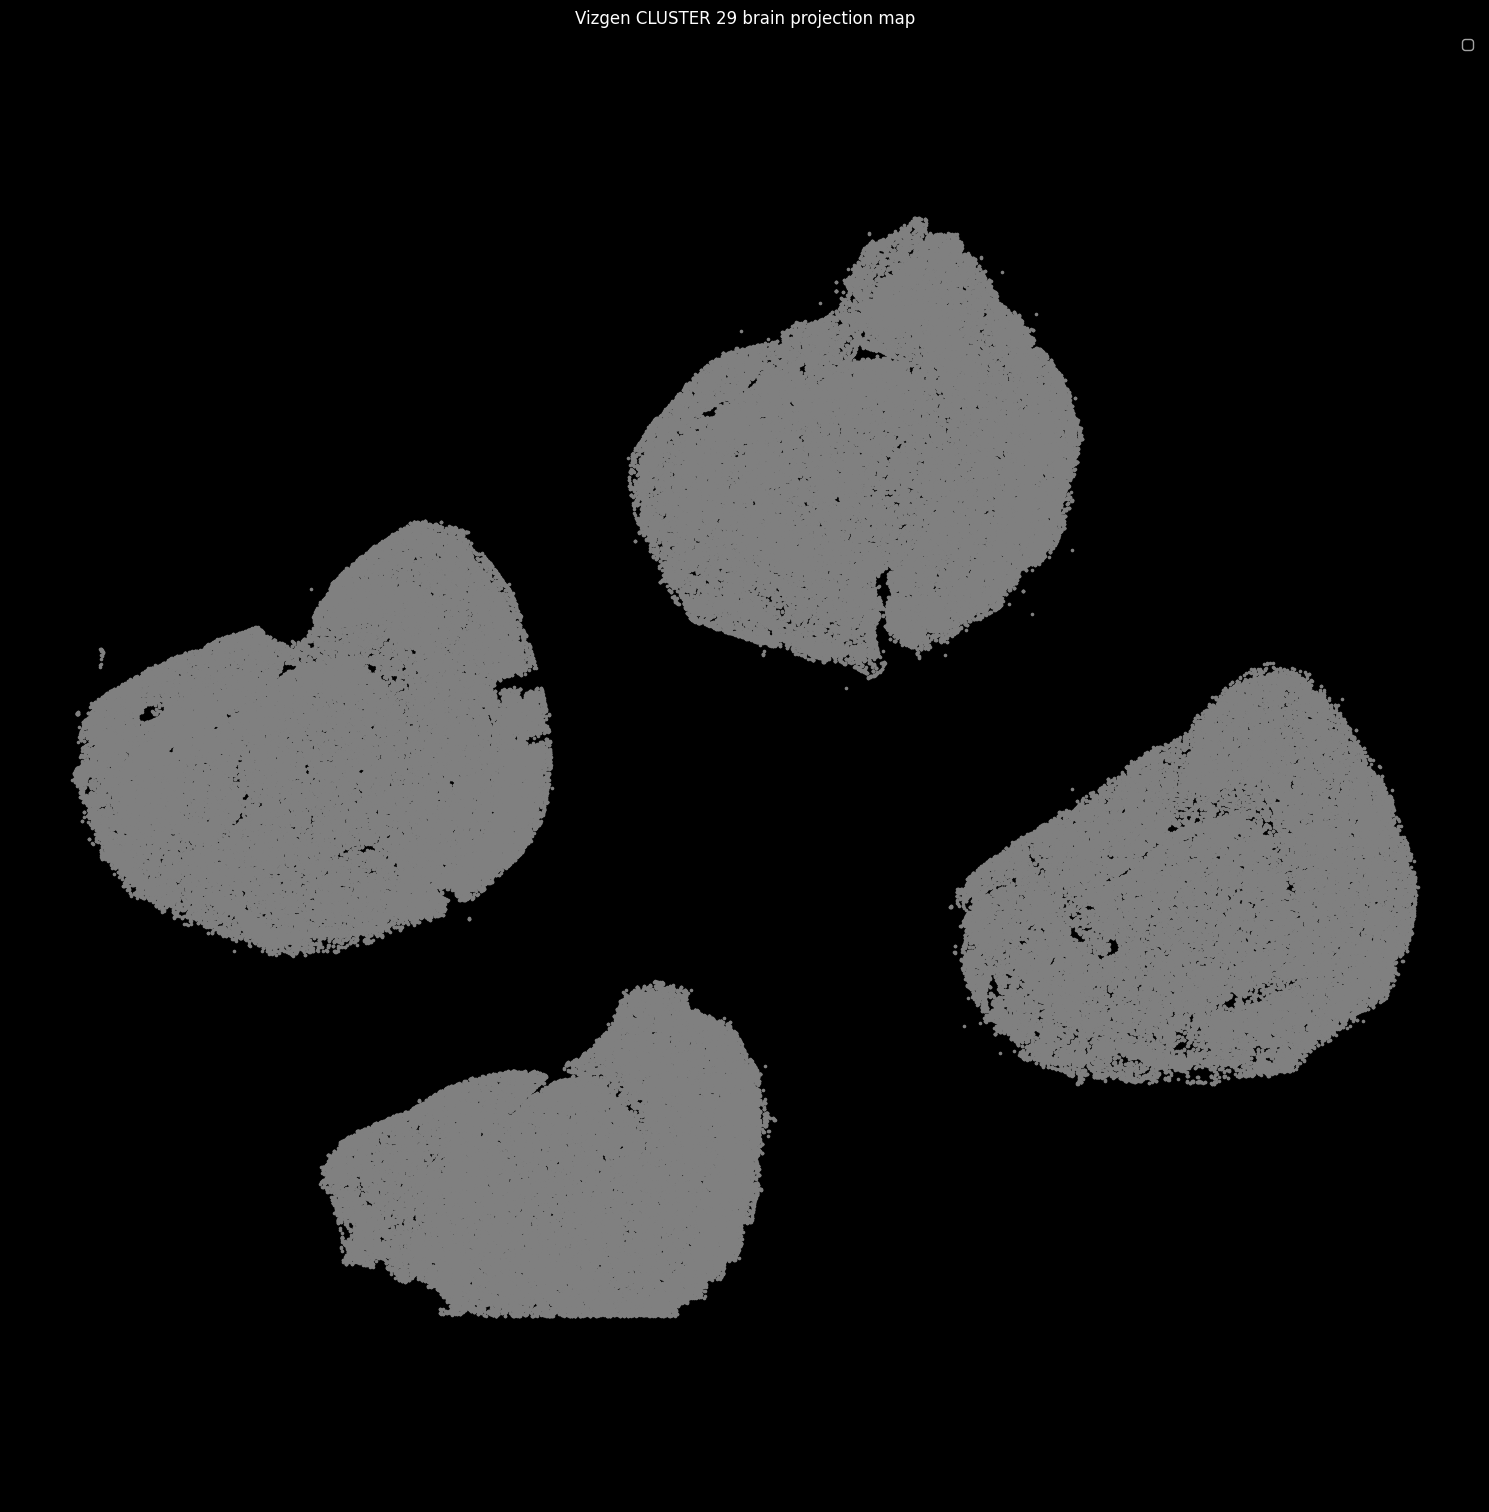

In [20]:
for cluster in unlabeled_clusters_array:
    adata_vizgen_unlabeled.plot_cluster_scdata(group = 'cluster_names', clusters = [cluster],  ref = adata_vizgen, sbig = 10, ssm = 10, flipy = -1)
    plt.title(f'Vizgen {cluster} brain projection map')

### Generate gene expression bar graphs

In [22]:
raw_counts = vizgen_scdata.X
raw_counts_dense = raw_counts
#raw_counts_dense
c24m2_raw_count_df_column_name = list(vizgen_scdata.var.index)
#xenium_raw_count_df_column_name
leiden_clusters = vizgen_scdata.obs['leiden']
leiden_clusters_list = list(leiden_clusters.index)
#leiden_clusters_list
c24m2_raw_count_df = pd.DataFrame(raw_counts_dense)
c24m2_raw_count_df.columns = c24m2_raw_count_df_column_name
c24m2_raw_count_df = c24m2_raw_count_df.T
c24m2_raw_count_df.columns = leiden_clusters_list
c24m2_raw_count_df = c24m2_raw_count_df.T
c24m2_raw_count_df = c24m2_raw_count_df.assign(leiden_cluster = leiden_clusters)
c24m2_raw_count_df = c24m2_raw_count_df.groupby('leiden_cluster').sum()
#xenium_raw_count_df.to_csv('xenium_raw_count_leiden.csv',index=True, mode='w')
#c24m2_raw_count_df

In [23]:
unlabeled_array = np.array(['2','4','5','6','9','18','20','23','24','25','26','27','28','29'])
color_palette = sns.color_palette("Set2")
raw_gene_array = np.empty((0,20))
for cluster in unlabeled_array:
    raw_gene_array_by_cluster = []
    for gene in vizgen_scdata.uns['rank_genes_groups']['names'][cluster][:20]:
        raw_gene_array_by_cluster = np.append(raw_gene_array_by_cluster, c24m2_raw_count_df.at[cluster, gene])
    raw_gene_array = np.vstack((raw_gene_array, raw_gene_array_by_cluster))

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


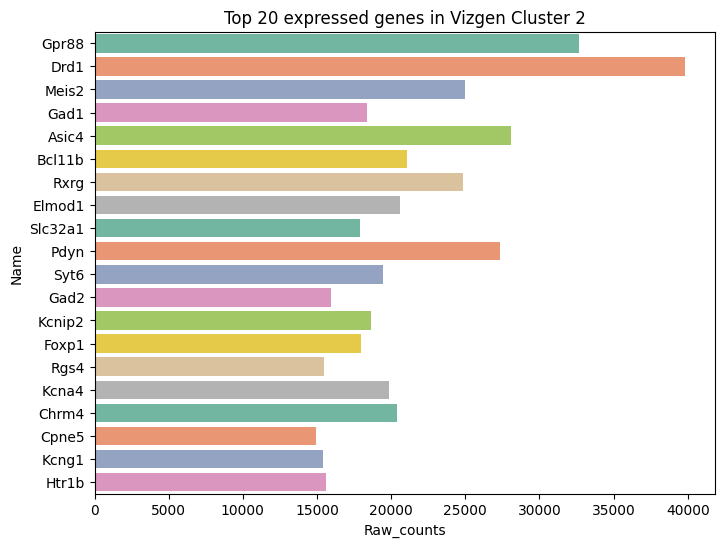

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


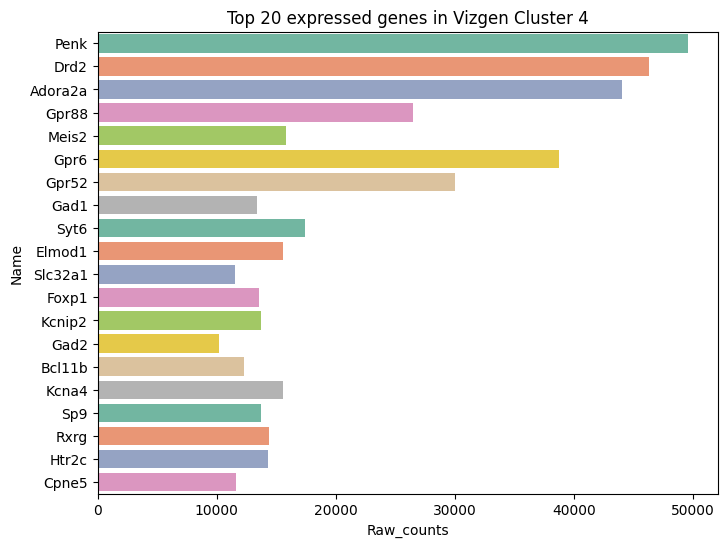

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


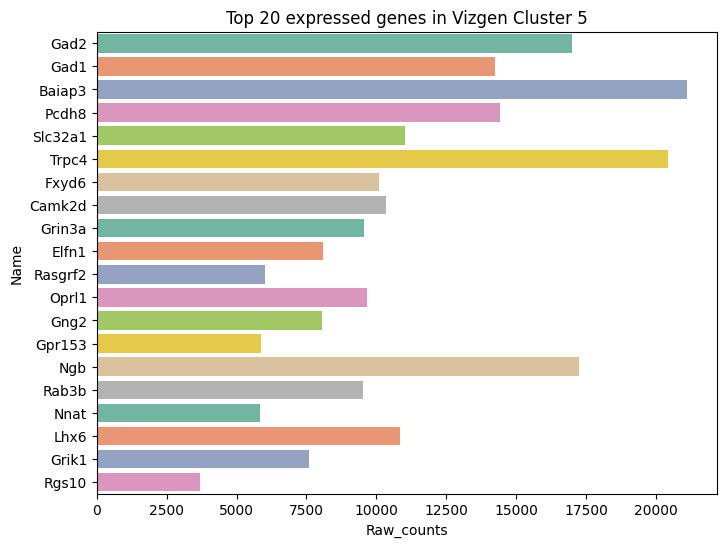

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


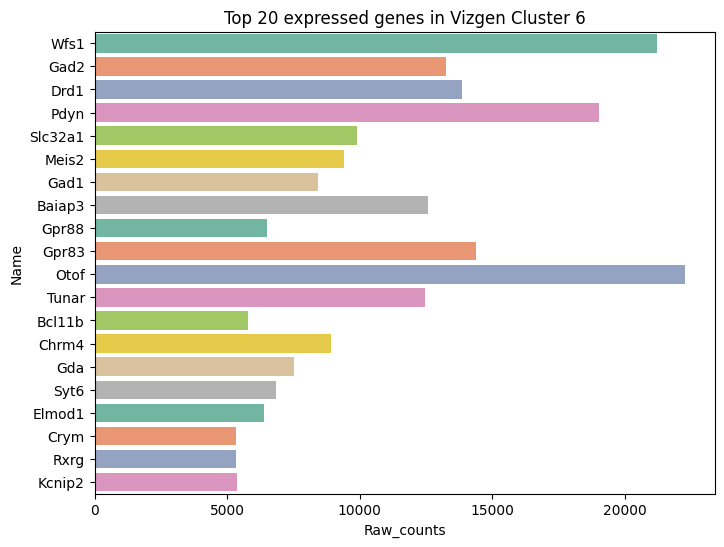

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


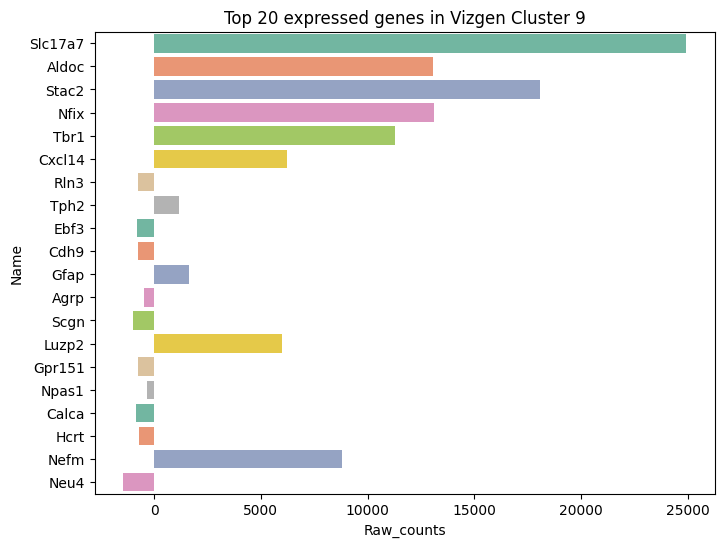

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


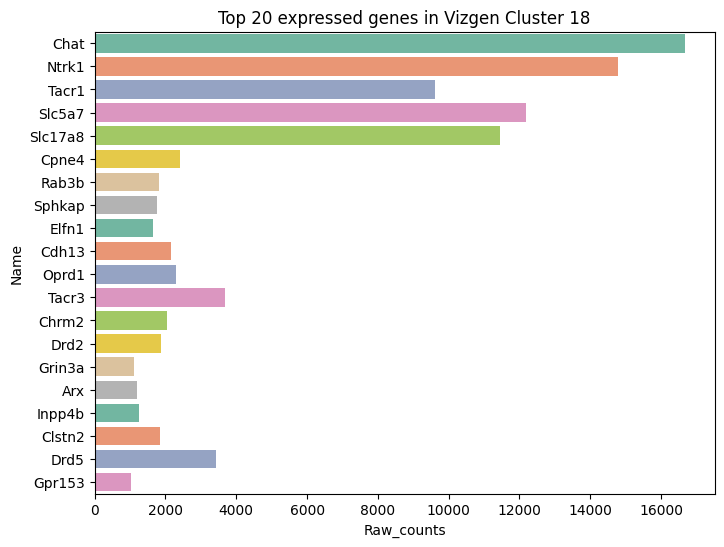

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


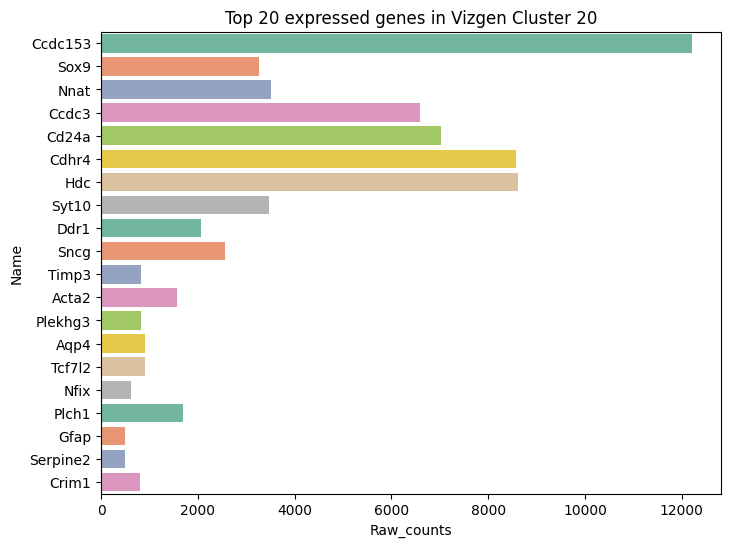

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


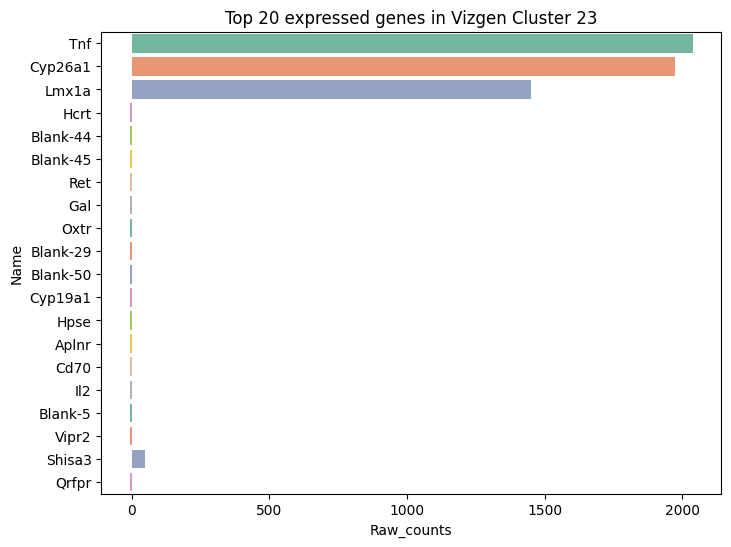

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


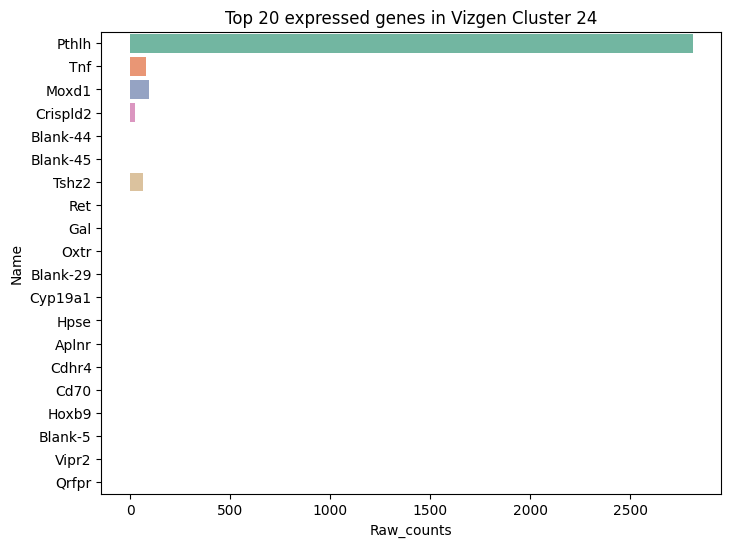

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


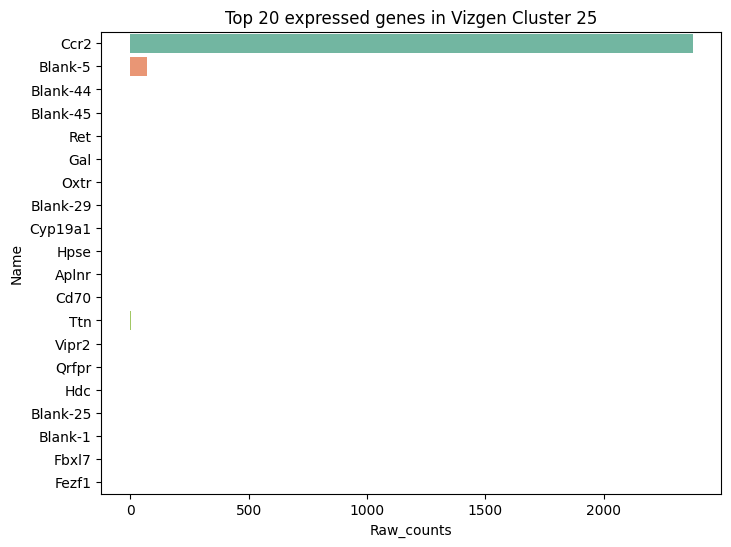

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


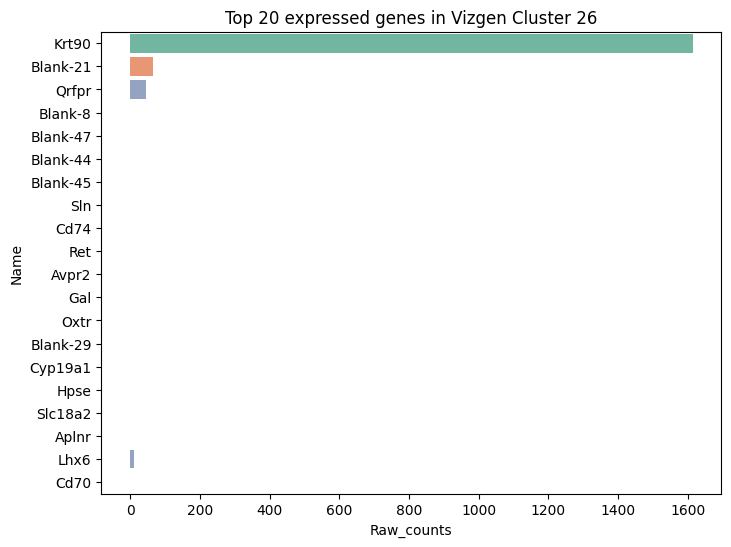

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


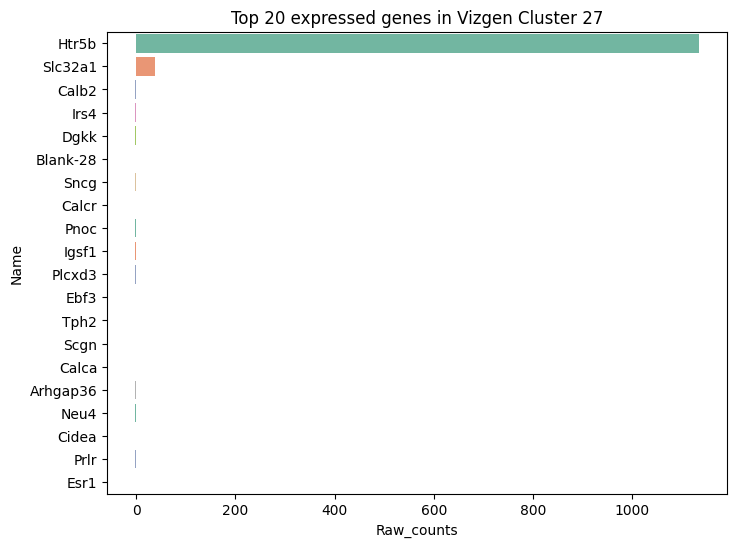

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


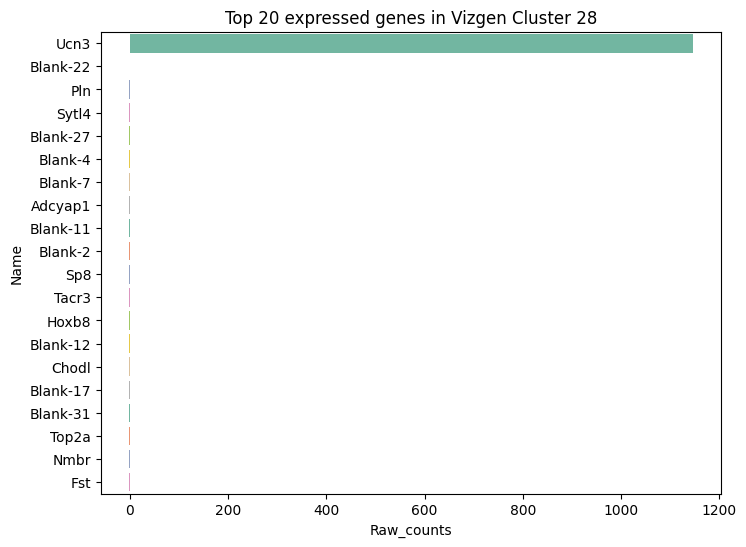

C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_25172\2946542708.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


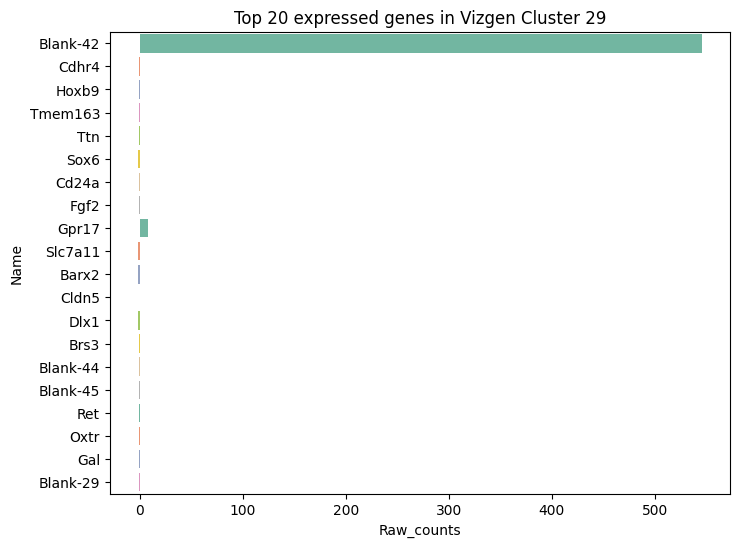

In [24]:
for cluster, i in zip(unlabeled_array, range(len(raw_gene_array))):
    x_label = raw_gene_array[i]
    y_label = vizgen_scdata.uns['rank_genes_groups']['names'][cluster][:20]
    graph_df = pd.DataFrame().assign(Name = y_label).assign(Raw_counts = x_label)
    #graph_df
    plt.style.use('default')
    plt.figure(figsize = (8, 6))
    sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
    plt.title(f'Top 20 expressed genes in Vizgen Cluster {cluster}')
    #plt.savefig(f'Xenium Cluster {cluster} top 20 gene expression bar chart')
    plt.show()